In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
# import ROOT
# import seaborn

In [2]:

# uni = "20230116_fea1_maxpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea1_maxpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea1_maxpool_aggradd_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggradd_ly5_cl3_k5"

# uni = "20230116_fea2_maxpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea2_maxpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea2_maxpool_aggradd_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggradd_ly5_cl3_k5"

# uni = "20230116_fea1_maxpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea1_maxpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea1_maxpool_aggradd_ly5_cl4_k5"
# uni = "20230116_fea1_meanpool_aggrmax_ly5_cl4_k15"
# uni = "20230116_fea1_meanpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea1_meanpool_aggradd_ly5_cl4_k5"

# uni = "20230116_fea2_maxpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea2_maxpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea2_maxpool_aggradd_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggradd_ly5_cl4_k5"


uni = "20230331_edcn_type5_cla3_l3_max_mean_logcosh_7"   #### X,Y,Z new best / CHEP result
# uni = "20230724_expand_self"
# uni = "20230705_SAVER_weight_loss_seed12345"
# uni = "20230703_weight_loss_test"

# uni = "20230331_edcn_type5_cla1_l3_max_mean_logcosh_3" #### energy new best
# uni = "20230403_edcn_wf1_cla1_l3_logcosh_max_max"
# uni = "20230328_dgcnn_type10_cla3_l3_logcosh"


# uni = "20230407_edcn_wf3_cla3_l3_logcosh_mean_max"
path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]



In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
pred = np.array(df['prediction']).reshape(-1,4)
label = np.array(df['label']).reshape(-1,4)
jade = np.array(df['jade']).reshape(-1,4)

# pred = np.array(df['prediction']).reshape(-1,3)
# label = np.array(df['label']).reshape(-1,3)
# jade = np.array(df['jade']).reshape(-1,3)

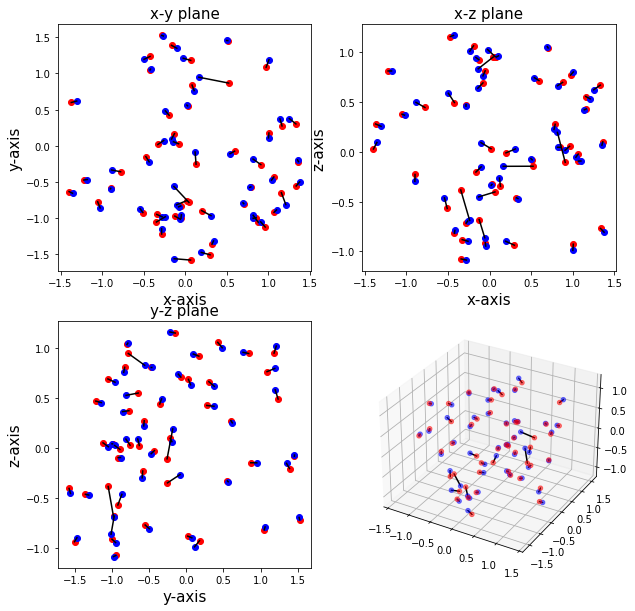

In [5]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.scatter(pred[:50,0],pred[:50,1],color='r')
ax1.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    ax1.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
ax1.set_title('x-y plane',fontsize=15)
ax1.set_xlabel('x-axis',fontsize=15)
ax1.set_ylabel('y-axis',fontsize=15)

ax2 = fig.add_subplot(222)
ax2.scatter(pred[:50,0],pred[:50,2],color='r')
ax2.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    ax2.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
ax2.set_title('x-z plane',fontsize=15)
ax2.set_xlabel('x-axis',fontsize=15)
ax2.set_ylabel('z-axis',fontsize=15)

ax3 = fig.add_subplot(223)
ax3.scatter(pred[:50,1],pred[:50,2],color='r')
ax3.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    ax3.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
ax3.set_title('y-z plane',fontsize=15)
ax3.set_xlabel('y-axis',fontsize=15)
ax3.set_ylabel('z-axis',fontsize=15)


ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax4.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax4.plot3D([pred[i,0],label[i,0]],
            [pred[i,1],label[i,1]],
            [pred[i,2],label[i,2]],'black')



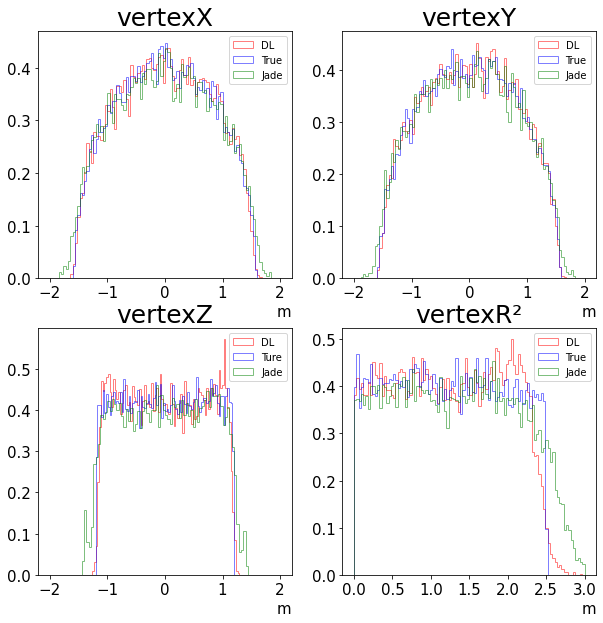

In [6]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(2,2,1)
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexX',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)
plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexY',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'Ture')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')
plt.title('vertexZ',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexR\u00b2',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


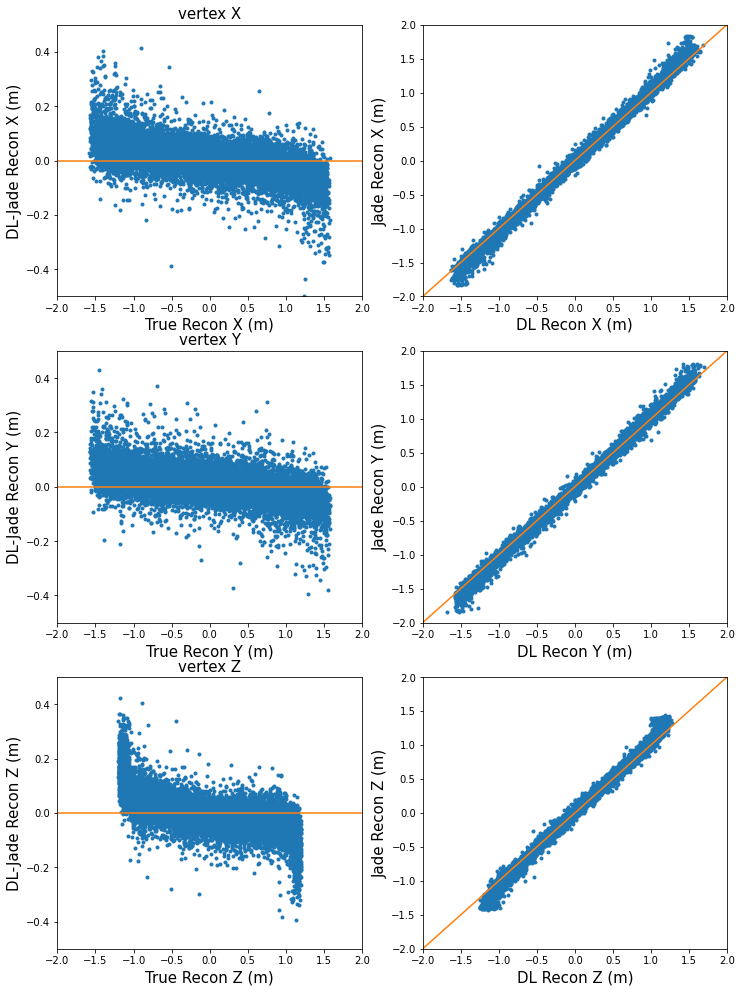

In [7]:
plt.rcParams['figure.figsize'] = (12, 17)
plt.subplot(3,2,1)
plt.plot(label[:,0],pred[:,0]-jade[:,0],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon X (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon X (m)',fontsize = 15)
plt.title('vertex X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,3)
plt.plot(label[:,1],pred[:,1]-jade[:,1],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon Y (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon Y (m)',fontsize = 15)
plt.title('vertex Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(3,2,5)
plt.plot(label[:,2],pred[:,2]-jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlabel('True Recon Z (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon Z (m)',fontsize = 15)
plt.title('vertex Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,2)
plt.plot(pred[:,0],jade[:,0],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon X (m)',fontsize = 15)
plt.ylabel('Jade Recon X (m)',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,4)
plt.plot(pred[:,1],jade[:,1],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon Y (m)',fontsize = 15)
plt.ylabel('Jade Recon Y (m)',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(3,2,6)
plt.plot(pred[:,2],jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-2,2])
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlabel('DL Recon Z (m)',fontsize = 15)
plt.ylabel('Jade Recon Z (m)',fontsize = 15)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()





In [8]:
print(label[:,0].max())
print(label[:,0].min())
print(label[:,1].max())
print(label[:,1].min())
print(label[:,2].max())
print(label[:,2].min())
print((label[:,0]**2+label[:,1]** 2).max())

1.5775200128555298
-1.578830003738403
1.5781899690628052
-1.5770601034164429
1.199869990348816
-1.1996899843215942
2.4985190352412907


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt


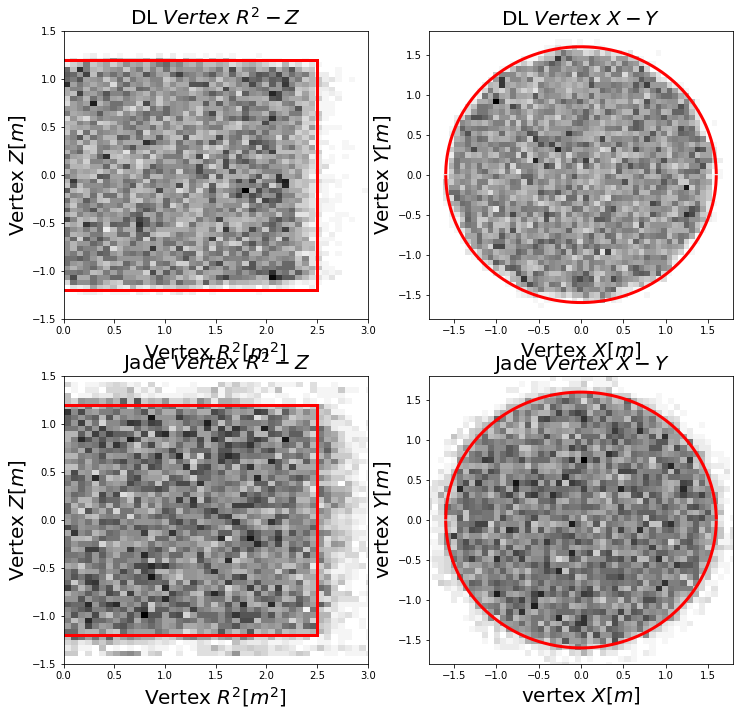

In [9]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (12, 18)
plt.subplot(3,2,1)
plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('DL '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)

plt.subplot(3,2,3)
plt.hist2d((jade[:,0]**2+jade[:,1]** 2),jade[:,2], bins = 50,cmap=r_map)
plt.axhline(y = 1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axhline(y = -1.2, xmin=0, xmax=0.83333, color='r',linewidth=3)
plt.axvline(x = 2.5,ymin=0.1,ymax=0.9,color='r',linewidth=3)

plt.title('Jade '+r"$Vertex$"+" "+r"$R^2-Z$",fontsize = 20)
plt.xlim([0,3])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$R^2[m^2]$", fontsize=20)
plt.ylabel("Vertex "+r"$Z[m]$", fontsize=20)



x = np.linspace(-100, 100, 500000)
y = np.sqrt(2.56 - x**2)

plt.subplot(3,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('DL '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("Vertex "+r"$Y[m]$", fontsize=20)


plt.subplot(3,2,4)
plt.hist2d(jade[:,0],jade[:,1], bins = 50,cmap=r_map)
plt.plot(x, y,color =  'red',linewidth=3.0)
plt.plot(x, -y,color =  'red',linewidth=3.0)
plt.title('Jade '+r"$Vertex$"+" "+r"$X-Y$",fontsize = 20)
plt.xlim([-1.8,1.8])
plt.ylim([-1.8,1.8])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex "+r"$X[m]$", fontsize=20)
plt.ylabel("vertex "+r"$Y[m]$", fontsize=20)


plt.show()

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in true_divide


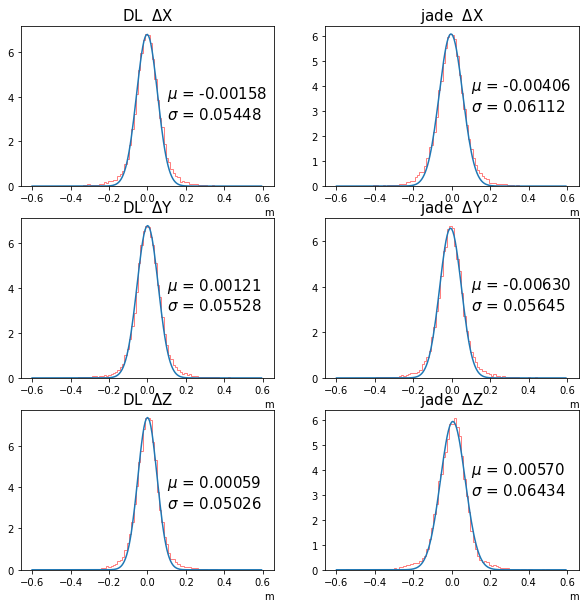

In [10]:

ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



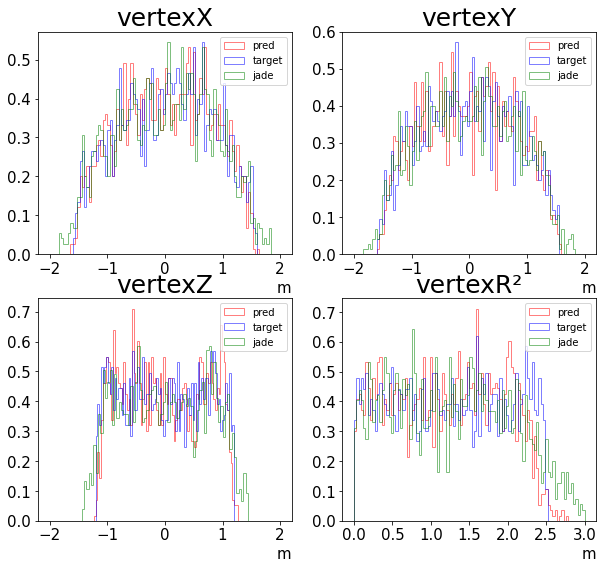

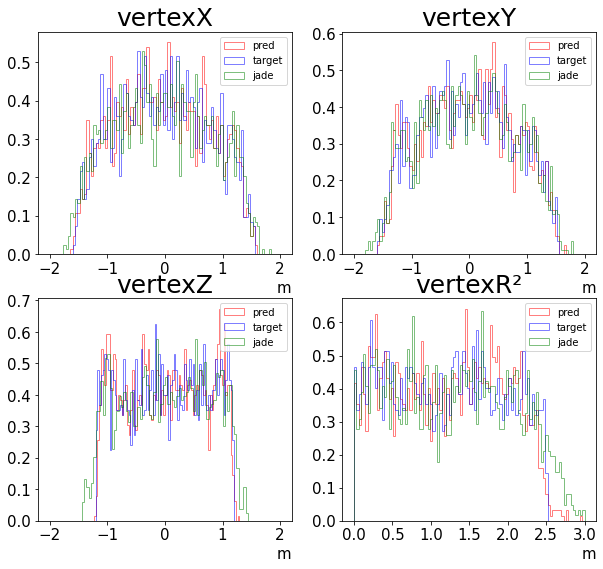

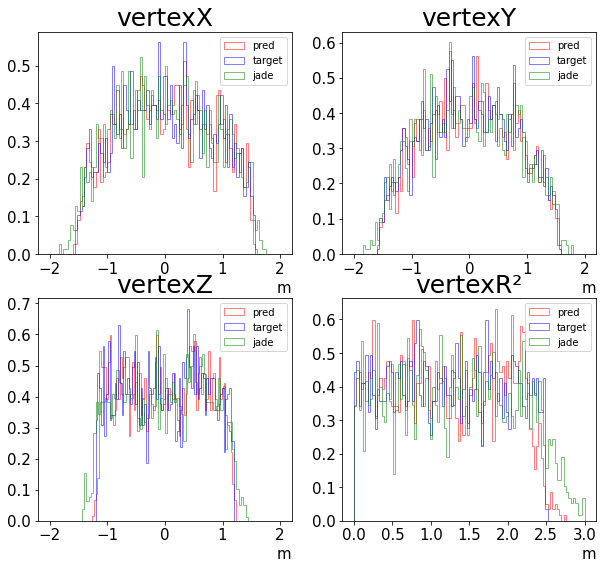

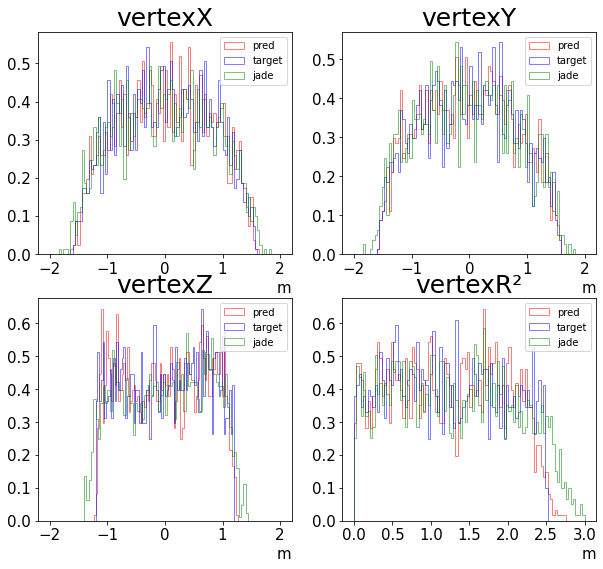

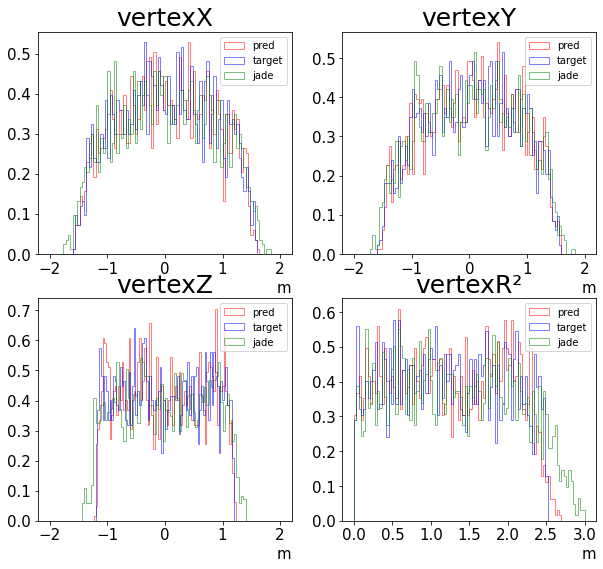

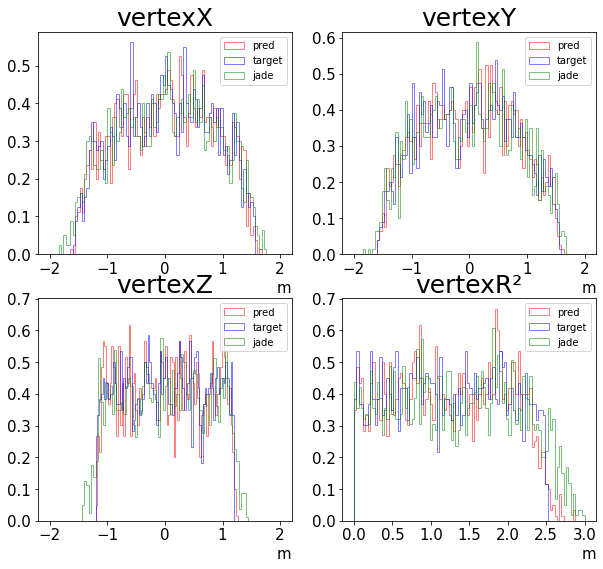

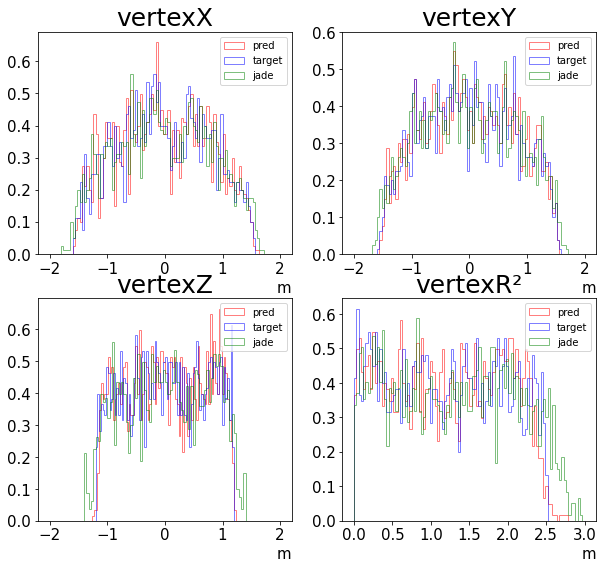

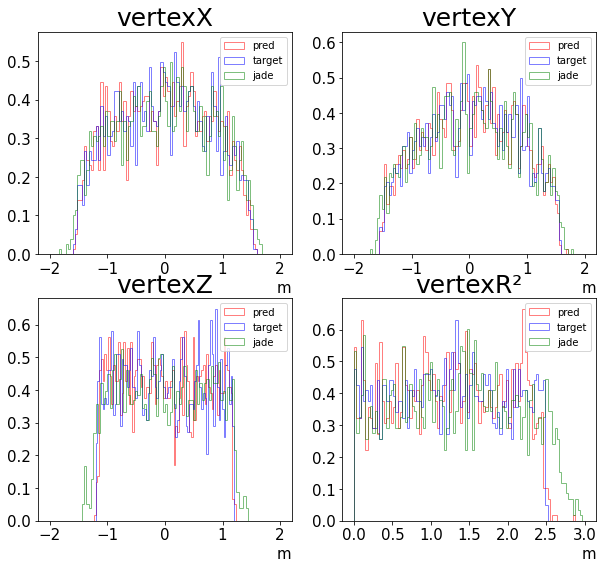

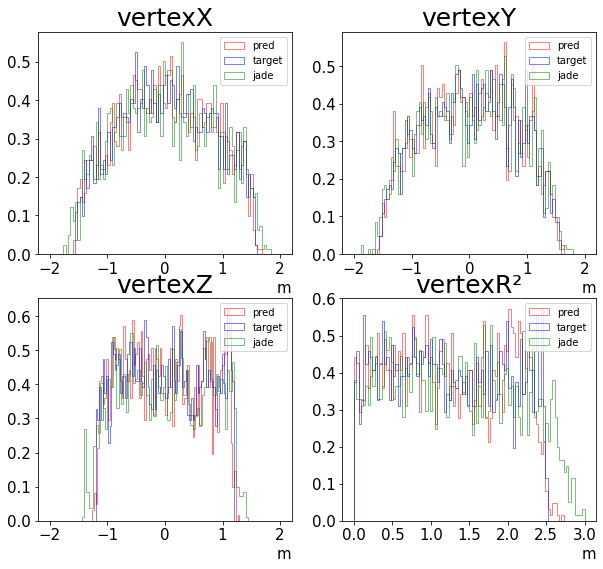

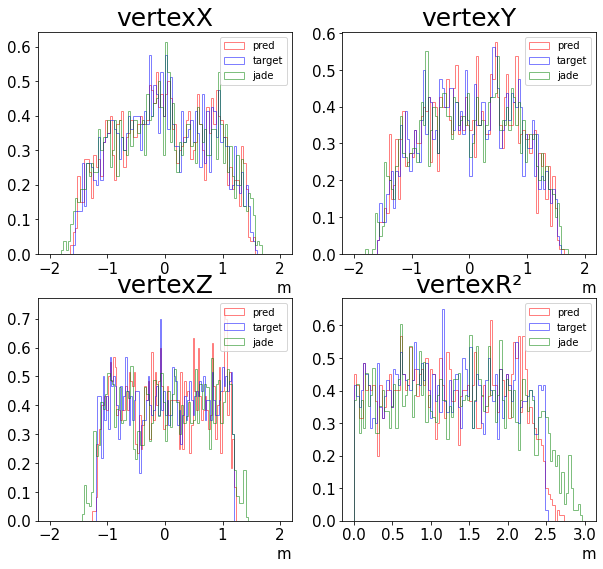

In [11]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
# energy_list=[1]
for a in energy_list:
    plt.rcParams['figure.figsize'] = (10, 9)
    plt.subplot(2,2,1)
    ######### jsns2 geo
    plt.hist(pred[:,0][pred[:,3] == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,0][label[:,3] == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

    plt.hist(jade[:,0][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    # plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexX',fontsize = 25)
    # plt.xlim([-0.0005,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,2)

    plt.hist(pred[:,1][pred[:,3] == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,1][label[:,3] == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,1][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexY',fontsize = 25)
    # plt.xlim([-0.00016,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()

    plt.subplot(2,2,3)
    plt.hist(pred[:,2][pred[:,3] == a], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,2][label[:,3] == a], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,2][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexZ',fontsize = 25)
    # plt.xlim([-3,3])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,4)
    plt.hist((pred[:,0][pred[:,3]== a]**2+pred[:,1][pred[:,3]== a]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist((label[:,0][label[:,3] == a]**2+label[:,1][label[:,3] == a]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist((jade[:,0][label[:,3] == a]**2+jade[:,1][label[:,3] == a]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexR\u00b2',fontsize = 25)
    # plt.xlim([-1,6])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()
    plt.show()


A: 1072.61223 +/- 0.34696
mu: -1.15697 +/- 0.02101
sigma: 56.24032 +/- 0.02101
A: 1073.10303 +/- 0.34603
mu: 1.87156 +/- 0.02105
sigma: 56.54297 +/- 0.02105
A: 1160.32159 +/- 0.36095
mu: -0.03164 +/- 0.01867
sigma: 51.96612 +/- 0.01867
A: 956.75898 +/- 0.32704
mu: -4.29355 +/- 0.02498
sigma: 63.30017 +/- 0.02498
A: 1036.49835 +/- 0.34093
mu: -6.36119 +/- 0.02212
sigma: 58.24547 +/- 0.02212
A: 949.83676 +/- 0.32406
mu: 3.77721 +/- 0.02540
sigma: -64.47066 +/- 0.02540


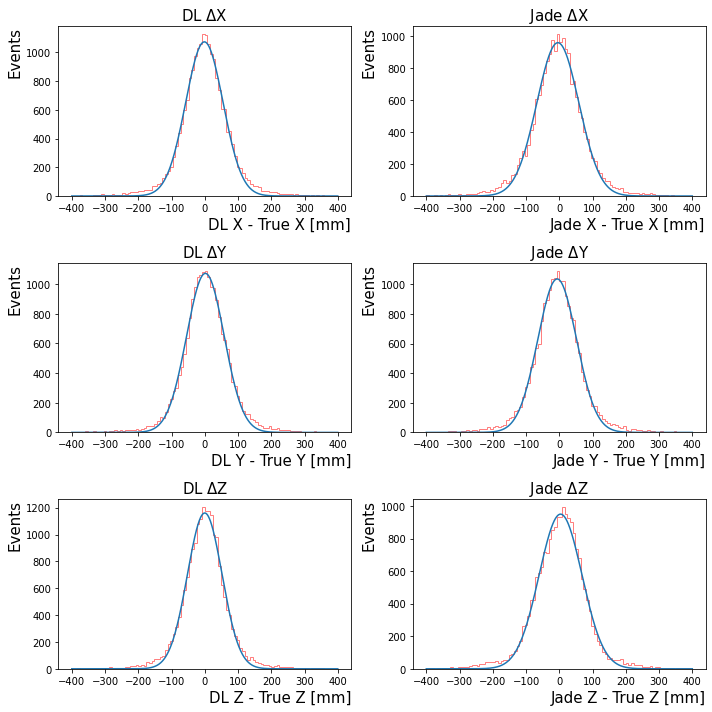

In [46]:
p0 = [10,0.01,15]
ran = 400
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)


data = (pred[:,0] - label[:,0])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL '+r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("DL X - True X [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.subplot(3,2,3)


data = (pred[:,1] - label[:,1])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL '+r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("DL Y - True Y [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)

data = (pred[:,2] - label[:,2])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL '+r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("DL Z - True Z [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')





plt.subplot(3,2,2)


data = (jade[:,0] - label[:,0])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade '+r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Jade X - True X [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,4)


data = (jade[:,1] - label[:,1])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade '+r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Jade Y - True Y [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)

data = (jade[:,2] - label[:,2])*1000

tmp_hist = plt.hist(data,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade '+r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))


plt.xlabel("Jade Z - True Z [mm]", fontsize=15, loc='right')
plt.ylabel("Events", fontsize=15,loc='top')
# plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.tight_layout()
plt.show()



In [13]:
# data = (pred[:,2] - label[:,2])*1000

# # Create a ROOT histogram
# h = ROOT.TH1F("hist", "Example Histogram", 100, -400, 400)
# for value in data:
#     h.Fill(value)

# # Fit a Gaussian function to the histogram
# fit_func = ROOT.TF1("fit_func", "gaus", -400, 400)
# h.Fit(fit_func, "Q")

# # Get the fit parameters
# mean = fit_func.GetParameter(1)
# mean_error = fit_func.GetParError(1)
# sigma = fit_func.GetParameter(2)
# sigma_error = fit_func.GetParError(2)

# # Draw the histogram and fit function
# c = ROOT.TCanvas("c", "Example Canvas", 800, 600)
# h.Draw()
# fit_func.Draw("same")

# # Save the plot to a file
# c.SaveAs("example_plot.png")

In [14]:
# p0 = [10,0.01,15]
# ran = 400
# def gaussian(x, A, mu, sigma):
#     f = A*np.exp(-(x-mu)**2/2./sigma**2)
#     return f

# plt.rcParams['figure.figsize'] = (10, 10)


# plt.subplot(3,2,1)
# tmp_hist = plt.hist((pred[:,0] - label[:,0])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran,ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)


# print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
# print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
# print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))

# plt.xlabel("DL X - True X [mm]", fontsize=10, loc='right')
# # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



# plt.subplot(3,2,3)

# tmp_hist = plt.hist((pred[:,1] - label[:,1])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran,ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel("DL Y - True Y [mm]", fontsize=10, loc='right')
# # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



# plt.subplot(3,2,5)
# tmp_hist = plt.hist((pred[:,2] - label[:,2])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran,ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel("DL Z - True Z [mm]", fontsize=10, loc='right')
# # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


# plt.subplot(3,2,2)
# tmp_hist = plt.hist((jade[:,0] - label[:,0])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran,ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('Jade  ' + r'$\Delta$X',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)

# plt.xlabel("Jade X - True X [mm]", fontsize=10, loc='right')
# # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



# plt.subplot(3,2,4)

# tmp_hist = plt.hist((jade[:,1] - label[:,1])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran,ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('Jade  ' + r'$\Delta$Y',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel("Jade Y - True Y [mm]", fontsize=10, loc='right')
# # plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



# plt.subplot(3,2,6)
# tmp_hist = plt.hist((jade[:,2] - label[:,2])*1000,bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
# hist_N = tmp_hist[0]
# hist_x = []
# for i in range(len(tmp_hist[1])-1):
#     tmp = tmp_hist[1]
#     hist_x.append((tmp[i] + tmp[i+1])/2.)
# hist_x = np.array(hist_x)

# popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, sigma=1./np.sqrt(hist_N), absolute_sigma=True)
# hist_xx = np.arange(-ran, ran,0.6/100.)
# ##A = popt[0]; mu = popt[1]; sigma = popt[2]
# plt.title('Jade  ' + r'$\Delta$Z',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel("Jade Z - True Z [mm]", fontsize=10, loc='right')
# # plt.text(-300,0,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

# plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

# plt.show()



In [15]:
# from scipy.stats import norm
# plt.rcParams['figure.figsize'] = (7, 7)
# data = (pred[:,0]-label[:,0])*1000
# # 히스토그램 생성
# hist, bin_edges = np.histogram(data, bins=100, range=(-400, 400))

# # 히스토그램 중심 계산
# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# # 초기 파라미터 추정
# mu_guess = 0
# sigma_guess = 100
# A_guess = np.max(hist)

# # 초기 추정값으로부터 gaussian 함수 정의
# def gaussian(x, A, mu, sigma):
#     return A * norm.pdf(x, mu, sigma)

# # curve_fit 메소드를 사용하여 gaussian fitting 수행

# p0 = [A_guess, mu_guess, sigma_guess]
# popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0,maxfev=8000)

# # 파라미터 값과 에러 출력
# print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
# print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
# print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))

# # 플롯 생성
# plt.hist(data, bins=100, range=(-400, 400), density=False, alpha=0.5, histtype = 'step',color='r')
# plt.plot(bin_centers, gaussian(bin_centers, *popt), 'b-', label='Fit')
# plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.xlabel("DL Reconstructed Y - True Y [mm]", fontsize=15, loc='right')
# plt.ylabel("Events", fontsize=15,loc='top')

# # plt.legend()
# plt.show()



/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 1


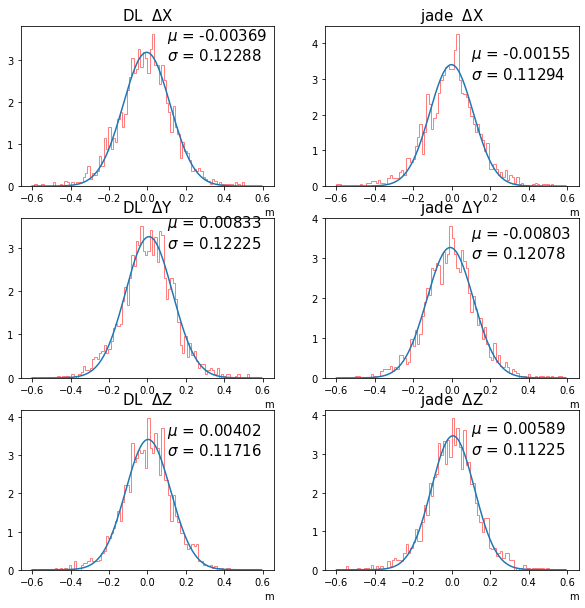

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 2


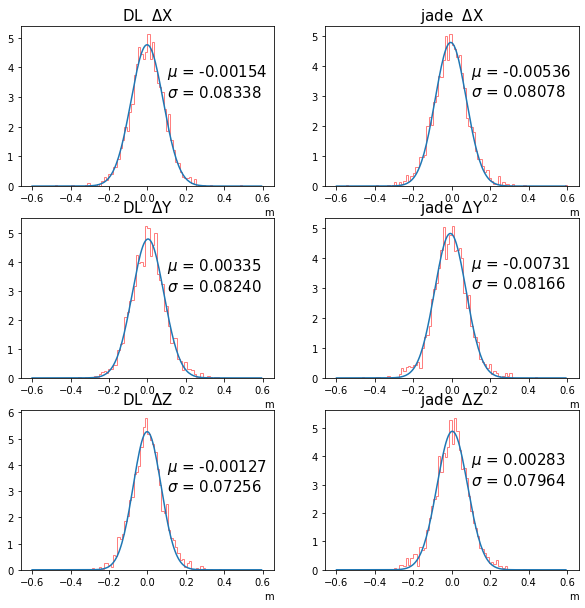

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 3


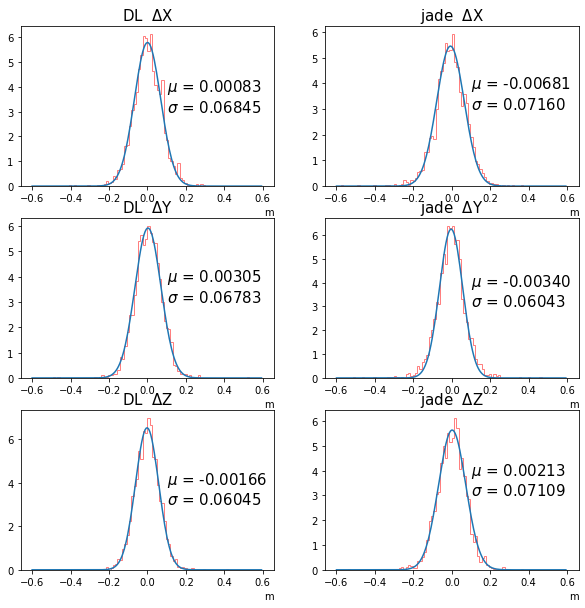

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 4


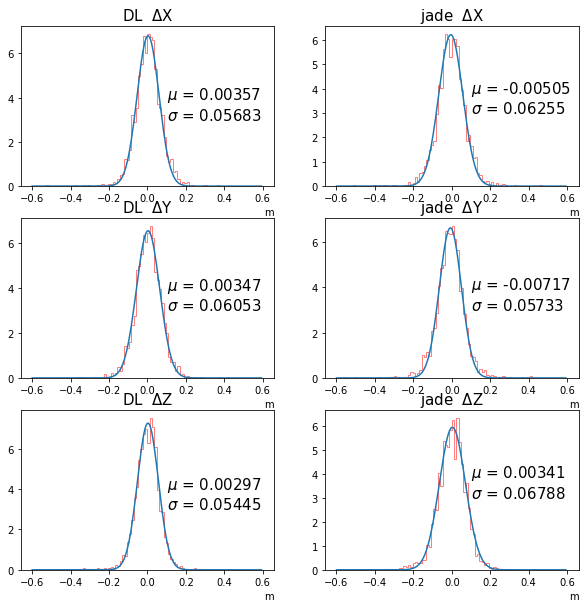

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 5


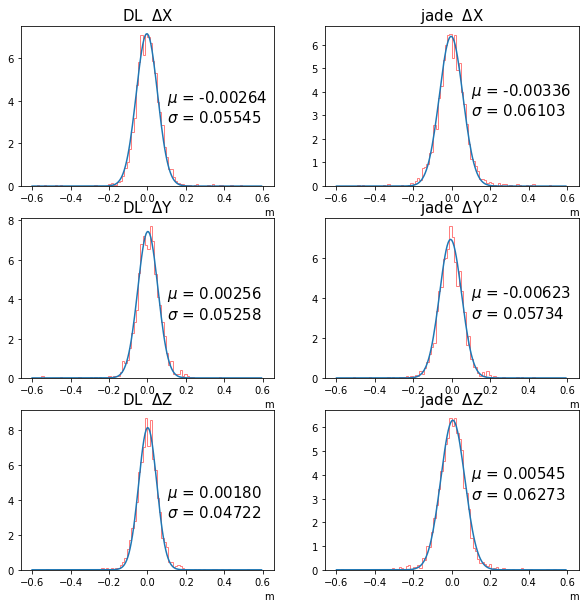

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 6


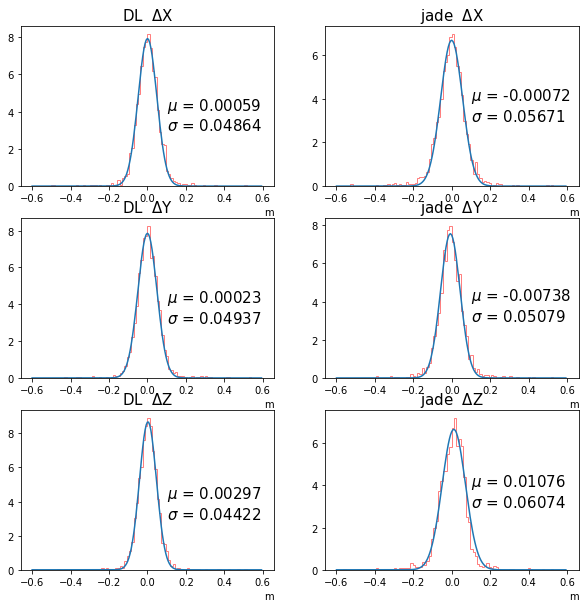

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 7


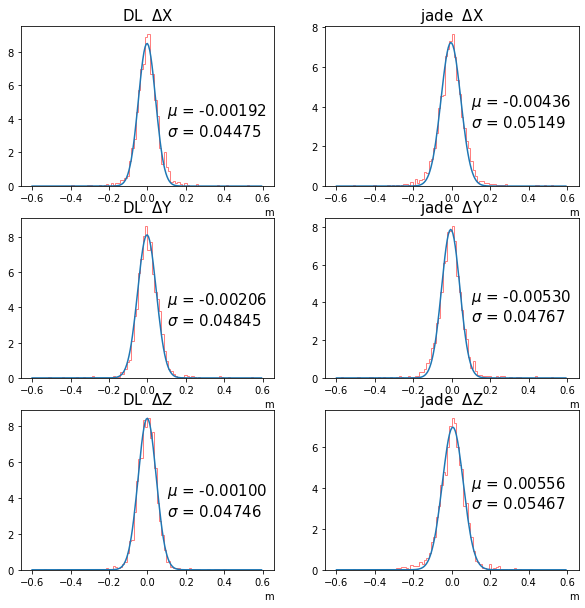

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 8


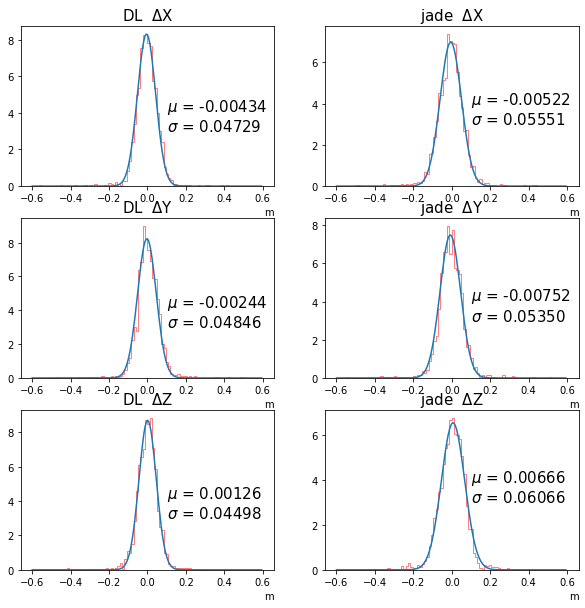

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 9


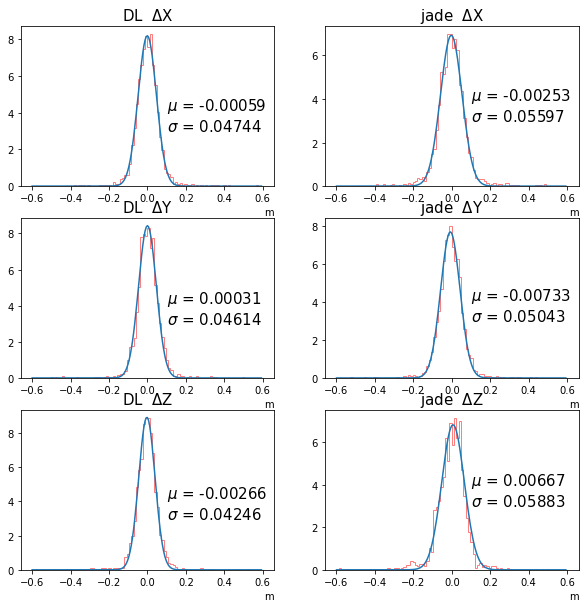

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in true_divide


Energy = 10


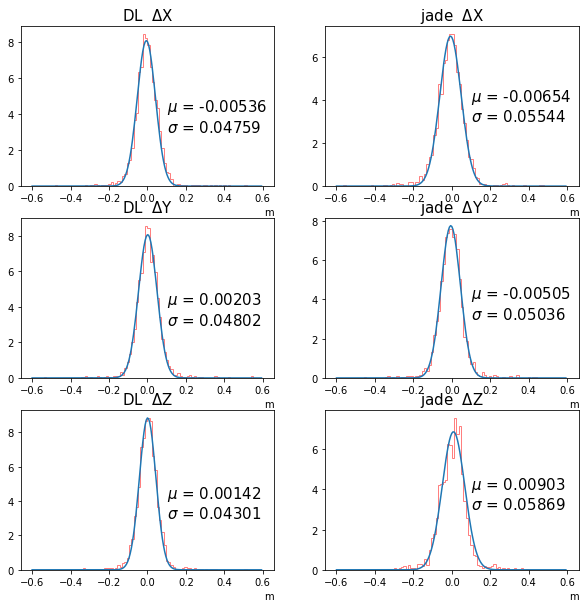

In [16]:

for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(3,2,1)
    tmp_hist = plt.hist(pred[:,0][label[:,3] == a] - label[:,0][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,3)

    tmp_hist = plt.hist(pred[:,1][label[:,3] == a] - label[:,1][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,5)
    tmp_hist = plt.hist(pred[:,2][label[:,3] == a] - label[:,2][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


    plt.subplot(3,2,2)
    tmp_hist = plt.hist(jade[:,0][label[:,3] == a] - label[:,0][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$X',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,4)

    tmp_hist = plt.hist(jade[:,1][label[:,3] == a] - label[:,1][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Y',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,6)
    tmp_hist = plt.hist(jade[:,2][label[:,3] == a] - label[:,2][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=8000)
    hist_xx = np.arange(-ran, ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Z',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    print('Energy = ' + str(a))
    
    
    plt.show()



In [17]:
# re_mu_x = []
# re_mu_y = []
# re_mu_z = []

# re_si_x = []
# re_si_y = []
# re_si_z = []

# re_mu_x_error = []
# re_mu_y_error = []
# re_mu_z_error = []

# re_si_x_error = []
# re_si_y_error = []
# re_si_z_error = []

# p0 = [10,0.01,15]
# ran = 400

# for a in energy_list:
    
#     def gaussian(x, A, mu, sigma):
#         f = A*np.exp(-(x-mu)**2/2./sigma**2)
#         return f

#     for vtx in range(3):
#         data = 1000*(pred[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a])
                     
#         tmp_hist = plt.hist(data, bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = False, histtype = 'step')
#         hist_N = tmp_hist[0]
#         hist_x = []
#         for i in range(len(tmp_hist[1])-1):
#             tmp = tmp_hist[1]
#             hist_x.append((tmp[i] + tmp[i+1])/2.)
#         hist_x = np.array(hist_x)

#         popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=p0, absolute_sigma=True,maxfev=80000)
#         if vtx == 0:
#             re_mu_x.append(popt[1])
#             re_si_x.append(popt[2])
                     
#             re_mu_x_error.append(np.sqrt(pcov[1][1]))
#             re_si_x_error.append(np.sqrt(pcov[2][2]))
#         if vtx == 1:
#             re_mu_y.append(popt[1])
#             re_si_y.append(popt[2])
#             re_mu_y_error.append(np.sqrt(pcov[1][1]))
#             re_si_y_error.append(np.sqrt(pcov[2][2]))
#         if vtx == 2:
#             re_mu_z.append(popt[1])
#             re_si_z.append(popt[2])
#             re_mu_z_error.append(np.sqrt(pcov[1][1]))
#             re_si_z_error.append(np.sqrt(pcov[2][2]))

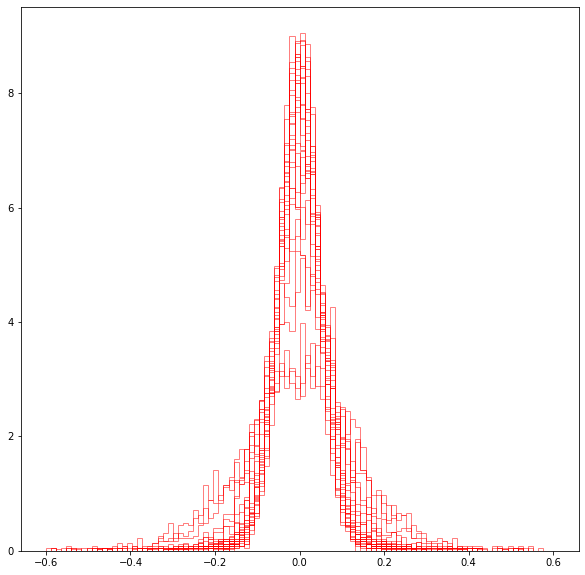

In [18]:
re_mu_x = []
re_mu_y = []
re_mu_z = []

re_si_x = []
re_si_y = []
re_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(pred[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], absolute_sigma=True,maxfev=8000)
        if vtx == 0:
            re_mu_x.append(popt[1])
            re_si_x.append(popt[2])
        if vtx == 1:
            re_mu_y.append(popt[1])
            re_si_y.append(popt[2])
        if vtx == 2:
            re_mu_z.append(popt[1])
            re_si_z.append(popt[2])
        

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipyk

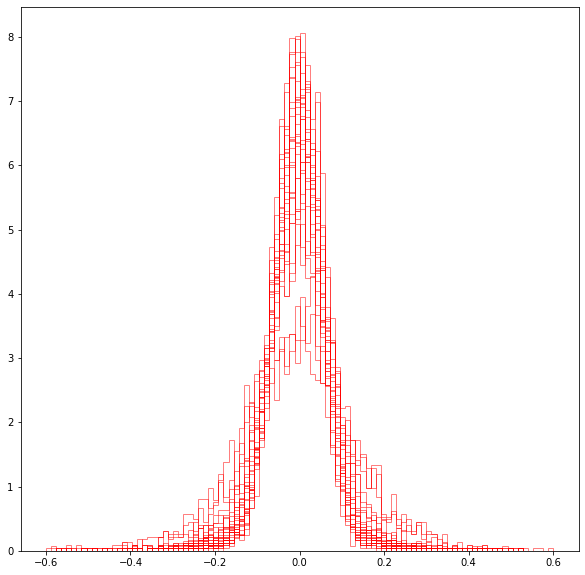

In [19]:
ja_mu_x = []
ja_mu_y = []
ja_mu_z = []

ja_si_x = []
ja_si_y = []
ja_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(jade[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if vtx == 0:
            ja_mu_x.append(popt[1])
            ja_si_x.append(popt[2])
        if vtx == 1:
            ja_mu_y.append(popt[1])
            ja_si_y.append(popt[2])
        if vtx == 2:
            ja_mu_z.append(popt[1])
            ja_si_z.append(popt[2])
        

In [20]:
E_Ns = []
for i in range(10):
    print(pred[:,vtx][label[:,3] == (i+1)].shape[0])
    E_Ns.append(pred[:,vtx][label[:,3] == (i+1)].shape[0])

1880
2081
1955
2024
2082
1999
2008
1956
2042
1999


In [21]:
E_Ns = []
for i in range(10):
    print(jade[:,vtx][label[:,3] == (i+1)].shape[0])
    E_Ns.append(jade[:,vtx][label[:,3] == (i+1)].shape[0])

1880
2081
1955
2024
2082
1999
2008
1956
2042
1999


In [22]:
ja_mu_x

[-0.0015463370721008768,
 -0.005355913232684835,
 -0.006807082716448066,
 -0.0050500577701275,
 -0.003355968763603607,
 -0.0007225918698409119,
 -0.0043571747597930316,
 -0.005215757876769478,
 -0.0025349939477316637,
 -0.006542092343645982]

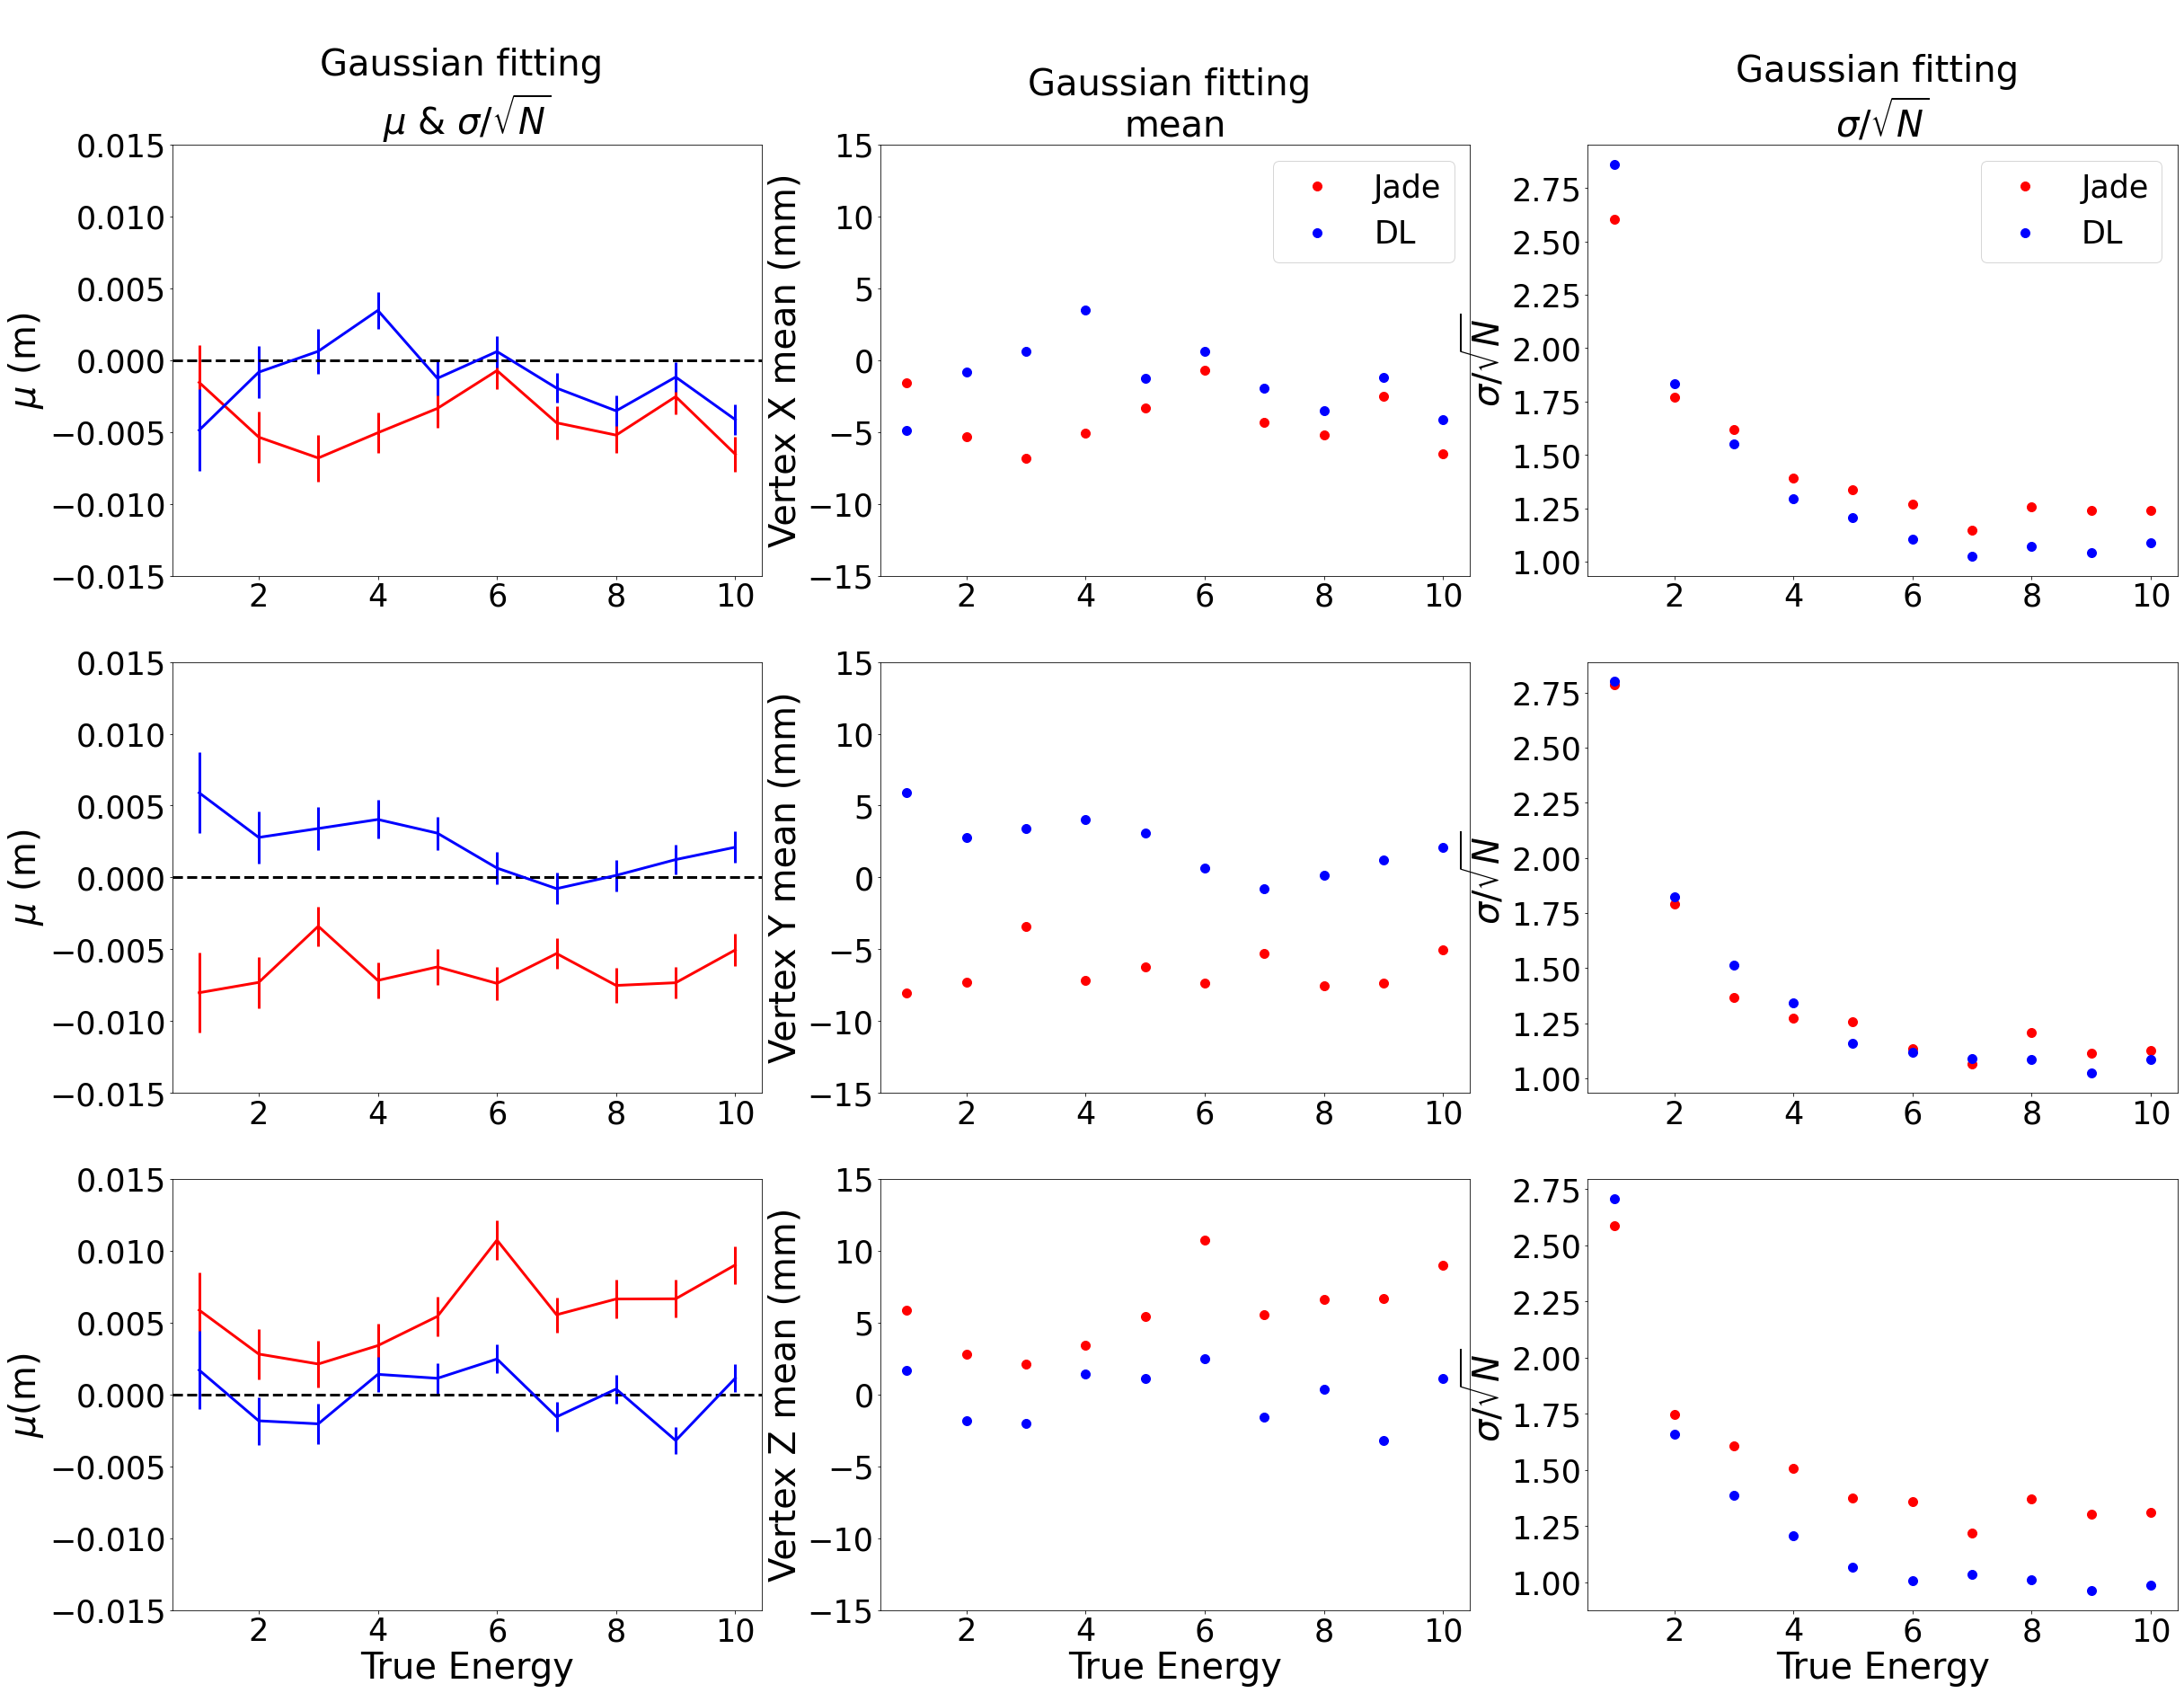

In [23]:
# plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.figsize'] = (40, 30)

plt.subplot(3,3,2)
plt.plot(energy_list,np.array(ja_mu_x)*1000,'or',label = 'Jade',markersize=10)
plt.plot(energy_list,np.array(re_mu_x)*1000,'ob',label = 'DL',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('Gaussian fitting \nmean',fontsize = 40)
# plt.xlabel('Energy',fontsize = 25)
plt.ylabel('Vertex X mean (mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,3,5)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.array(ja_mu_y)*1000,'or',label = 'Jade y',markersize=10)
plt.plot(energy_list,np.array(re_mu_y)*1000,'ob',label = 'DL y',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\mu$',fontsize = 25)
# plt.xlabel('Energy',fontsize = 25)
plt.ylabel('Vertex Y mean (mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
plt.ylim([-15,15])


plt.subplot(3,3,8)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.array(ja_mu_z)*1000,'or',label = 'Jade z',markersize=10)
plt.plot(energy_list,np.array(re_mu_z)*1000,'ob',label = 'DL z',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\mu$',fontsize = 25)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('Vertex Z mean (mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
plt.ylim([-15,15])




plt.subplot(3,3,3)
plt.plot(energy_list,np.abs(ja_si_x)*1000/np.sqrt(np.array(E_Ns)),'or',label = 'Jade',markersize=10)
plt.plot(energy_list,np.abs(re_si_x)*1000/np.sqrt(np.array(E_Ns)),'ob',label = 'DL',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('\nGaussian fitting \n$\sigma$/$\sqrt{N}$',fontsize = 40)
# plt.xlabel('Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])

plt.subplot(3,3,6)
plt.plot(energy_list,np.abs(ja_si_y)*1000/np.sqrt(np.array(E_Ns)),'or',label = 'Jade y',markersize=10)
plt.plot(energy_list,np.abs(re_si_y)*1000/np.sqrt(np.array(E_Ns)),'ob',label = 'DL y',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\sigma$',fontsize = 40)
# plt.xlabel('Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])


plt.subplot(3,3,9)
plt.plot(energy_list,np.abs(ja_si_z)*1000/np.sqrt(np.array(E_Ns)),'or',label = 'Jade z',markersize=10)
plt.plot(energy_list,np.abs(re_si_z)*1000/np.sqrt(np.array(E_Ns)),'ob',label = 'DL z',markersize=10)
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\sigma$',fontsize = 40)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])

plt.subplot(3,3,1)
plt.errorbar(energy_list,ja_mu_x,yerr=ja_si_x/np.sqrt(np.array(E_Ns)),label = 'Jade x',color = 'red',linewidth=3)
plt.errorbar(energy_list,re_mu_x,yerr=re_si_x/np.sqrt(np.array(E_Ns)),label = 'DL x',color = 'blue',linewidth=3)
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/$\sqrt{N}$',fontsize = 40)
# plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$ (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
plt.ylim([-0.015,0.015])


plt.subplot(3,3,4)
plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y/np.sqrt(np.array(E_Ns)),label = 'Jade y',color = 'red',linewidth=3)
plt.errorbar(energy_list,re_mu_y,yerr=re_si_y/np.sqrt(np.array(E_Ns)),label = 'DL y',color = 'blue',linewidth=3)
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\mu$ & $\sigma$',fontsize = 40)
# plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$ (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
plt.ylim([-0.015,0.015])


plt.subplot(3,3,7)
plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z/np.sqrt(np.array(E_Ns)),label = 'Jade z',color = 'red',linewidth=3)
plt.errorbar(energy_list,re_mu_z,yerr=re_si_z/np.sqrt(np.array(E_Ns)),label = 'DL z',color = 'blue',linewidth=3)
plt.axhline(y=0,color='black',linewidth=3, linestyle='--')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\mu$ & $\sigma$',fontsize = 40)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$(m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
# plt.legend(fontsize = 35)
plt.ylim([-0.015,0.015])

plt.show()



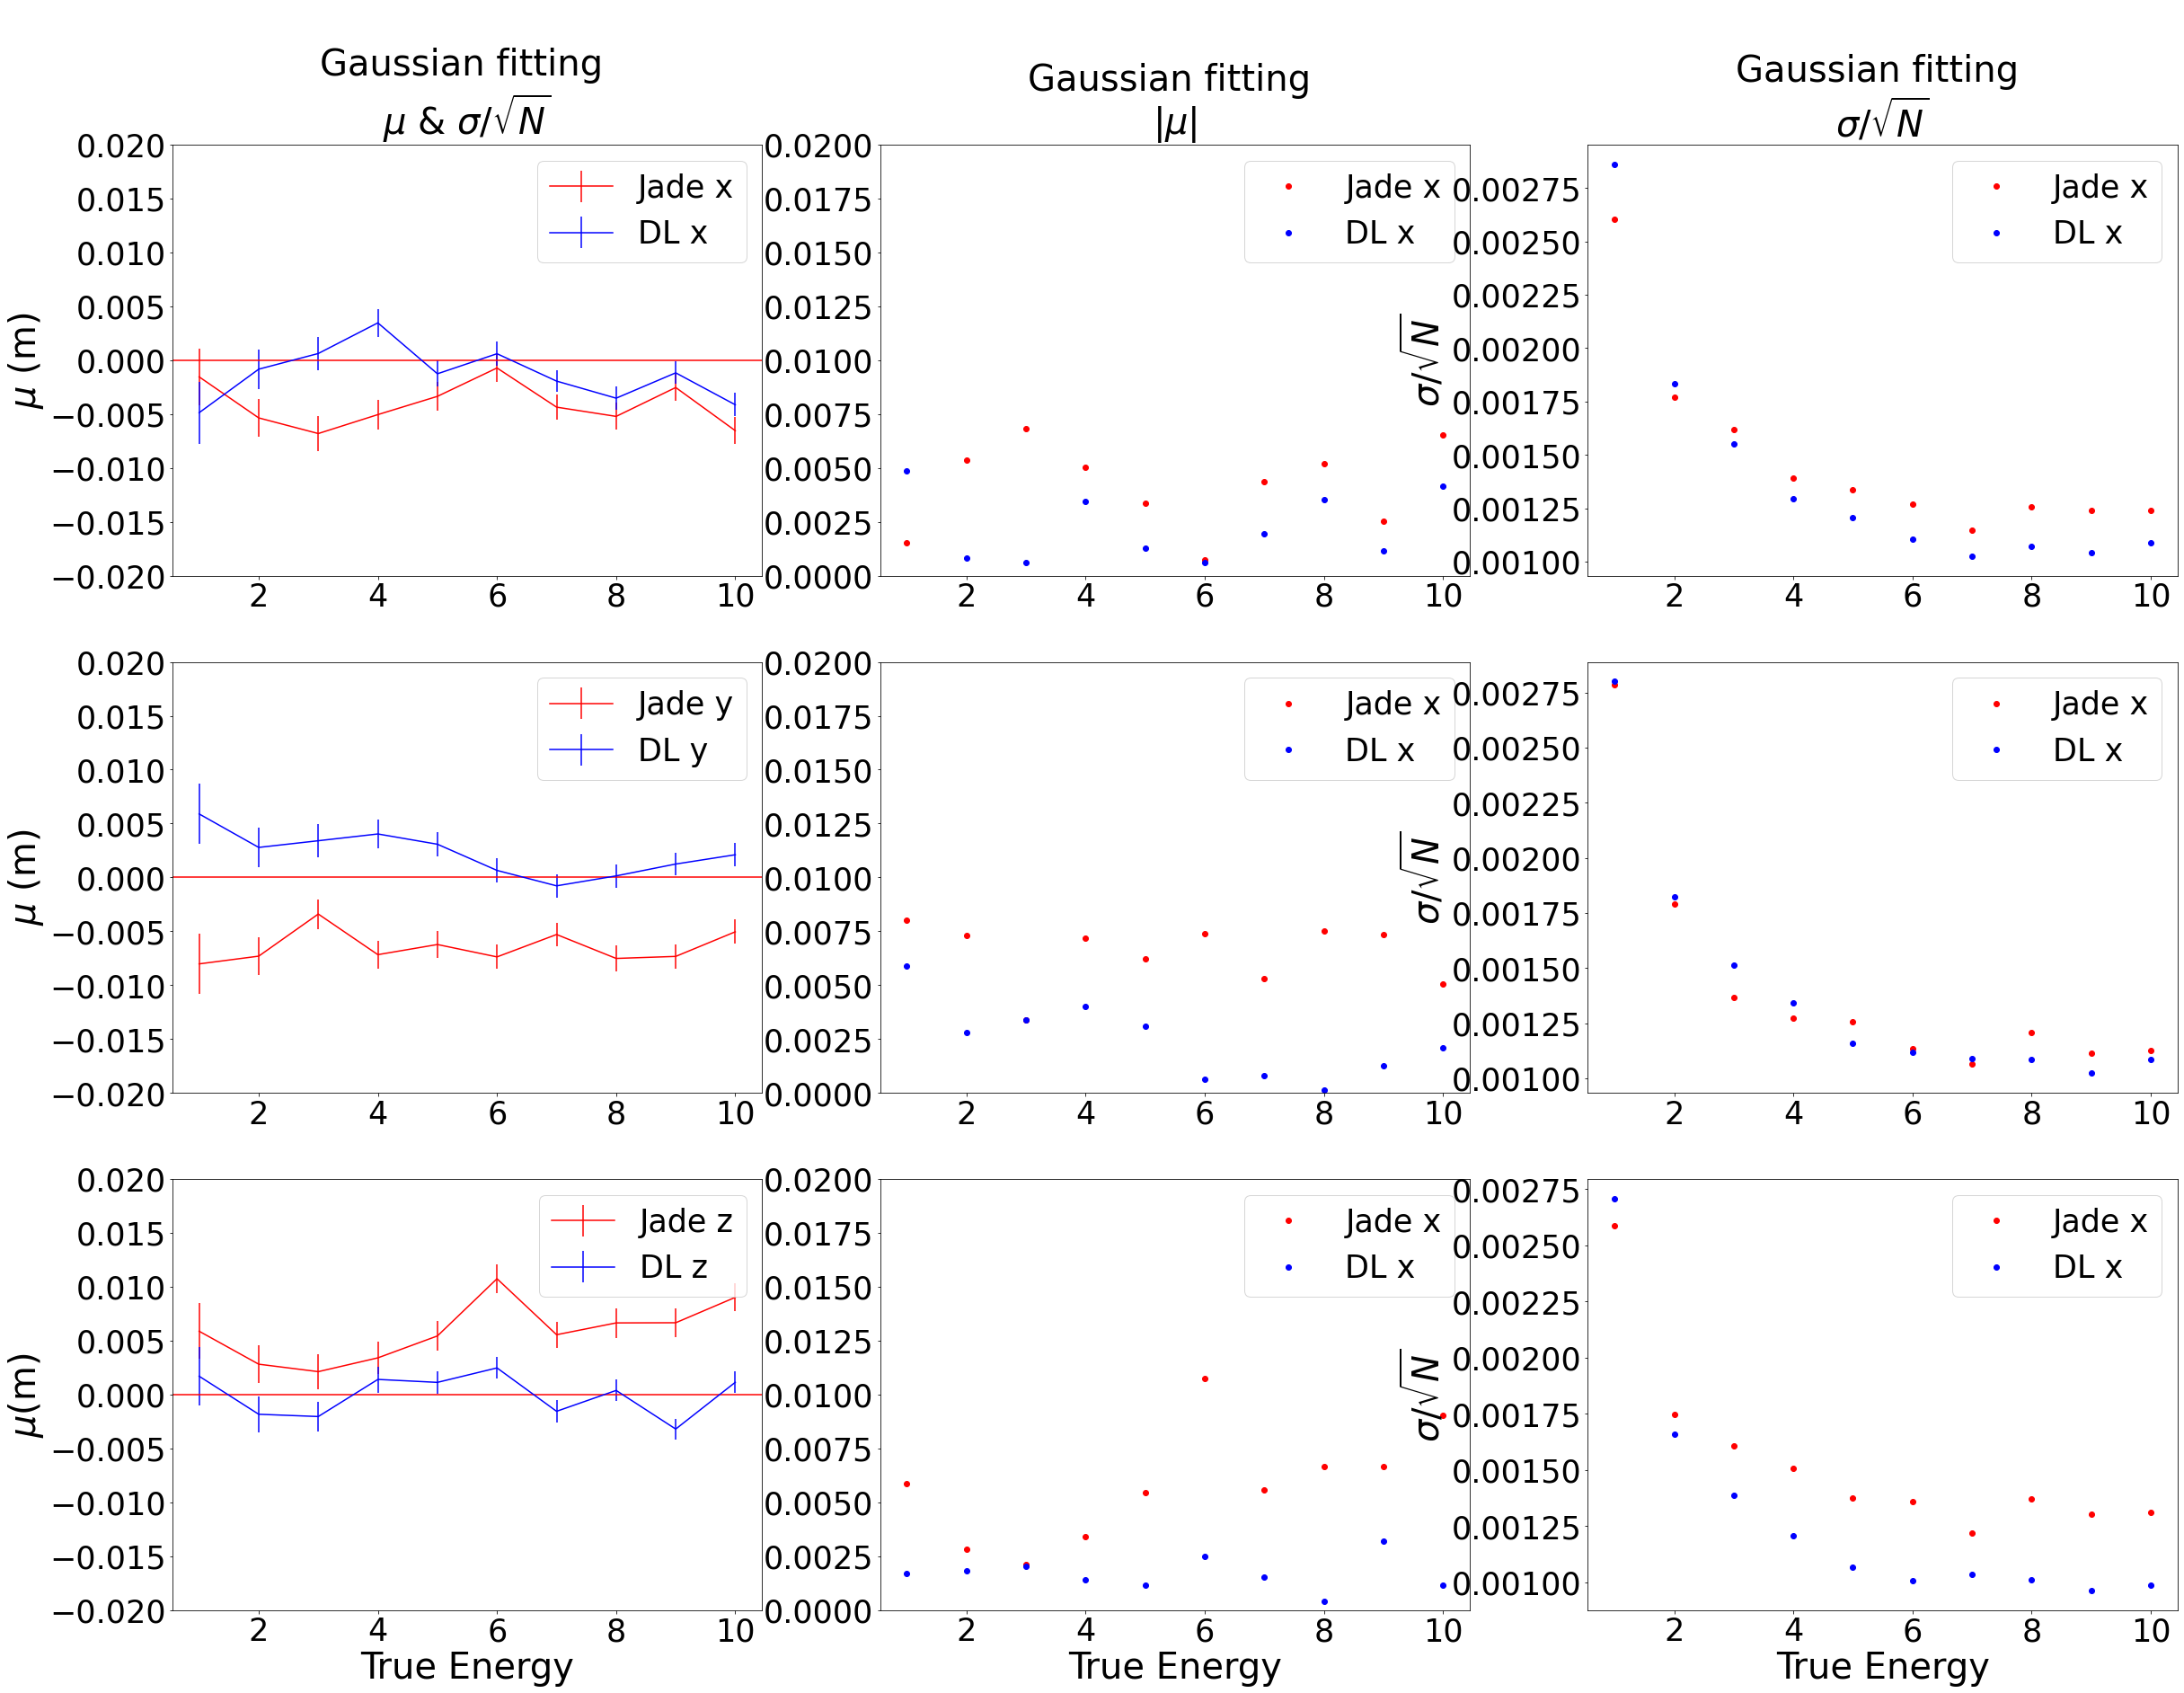

In [24]:
# plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.figsize'] = (40, 30)

plt.subplot(3,3,2)
plt.plot(energy_list,np.abs(ja_mu_x),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_mu_x),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('Gaussian fitting \n|$\mu$|',fontsize = 40)
# plt.xlabel('Energy',fontsize = 25)
plt.ylabel('|$\mu$| (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([0,0.02])
plt.legend(fontsize=35)

plt.subplot(3,3,5)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.abs(ja_mu_y),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_mu_y),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\mu$',fontsize = 25)
# plt.xlabel('Energy',fontsize = 25)
plt.ylabel('|$\mu$| (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([0,0.02])
plt.legend(fontsize=35)

plt.subplot(3,3,8)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,np.abs(ja_mu_z),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_mu_z),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\mu$',fontsize = 25)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('|$\mu$| (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([0,0.02])
plt.legend(fontsize=35)



plt.subplot(3,3,3)
plt.plot(energy_list,np.abs(ja_si_x)/np.sqrt(np.array(E_Ns)),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_x)/np.sqrt(np.array(E_Ns)),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('\nGaussian fitting \n$\sigma$/$\sqrt{N}$',fontsize = 40)
# plt.xlabel('Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)

plt.subplot(3,3,6)
plt.plot(energy_list,np.abs(ja_si_y)/np.sqrt(np.array(E_Ns)),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_y)/np.sqrt(np.array(E_Ns)),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\sigma$',fontsize = 40)
# plt.xlabel('Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)


plt.subplot(3,3,9)
plt.plot(energy_list,np.abs(ja_si_z)/np.sqrt(np.array(E_Ns)),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_z)/np.sqrt(np.array(E_Ns)),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\sigma$',fontsize = 40)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\sigma$/$\sqrt{N}$',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)


plt.subplot(3,3,1)
plt.errorbar(energy_list,ja_mu_x,yerr=ja_si_x/np.sqrt(np.array(E_Ns)),label = 'Jade x',color = 'red')
plt.errorbar(energy_list,re_mu_x,yerr=re_si_x/np.sqrt(np.array(E_Ns)),label = 'DL x',color = 'blue')
plt.axhline(y=0,color='red')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/$\sqrt{N}$',fontsize = 40)
# plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$ (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)

plt.subplot(3,3,4)
plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y/np.sqrt(np.array(E_Ns)),label = 'Jade y',color = 'red')
plt.errorbar(energy_list,re_mu_y,yerr=re_si_y/np.sqrt(np.array(E_Ns)),label = 'DL y',color = 'blue')
plt.axhline(y=0,color='red')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Y - $\mu$ & $\sigma$',fontsize = 40)
# plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$ (m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)

plt.subplot(3,3,7)
plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z/np.sqrt(np.array(E_Ns)),label = 'Jade z',color = 'red')
plt.errorbar(energy_list,re_mu_z,yerr=re_si_z/np.sqrt(np.array(E_Ns)),label = 'DL z',color = 'blue')
plt.axhline(y=0,color='red')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z - $\mu$ & $\sigma$',fontsize = 40)
plt.xlabel('True Energy',fontsize = 40)
plt.ylabel('$\mu$(m)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=35)
plt.show()



In [25]:
np.array(re_mu_x)*1000

array([-4.8734245 , -0.83501767,  0.62113216,  3.46475891, -1.26042155,
        0.60101879, -1.94058915, -3.52575243, -1.17308266, -4.1379956 ])

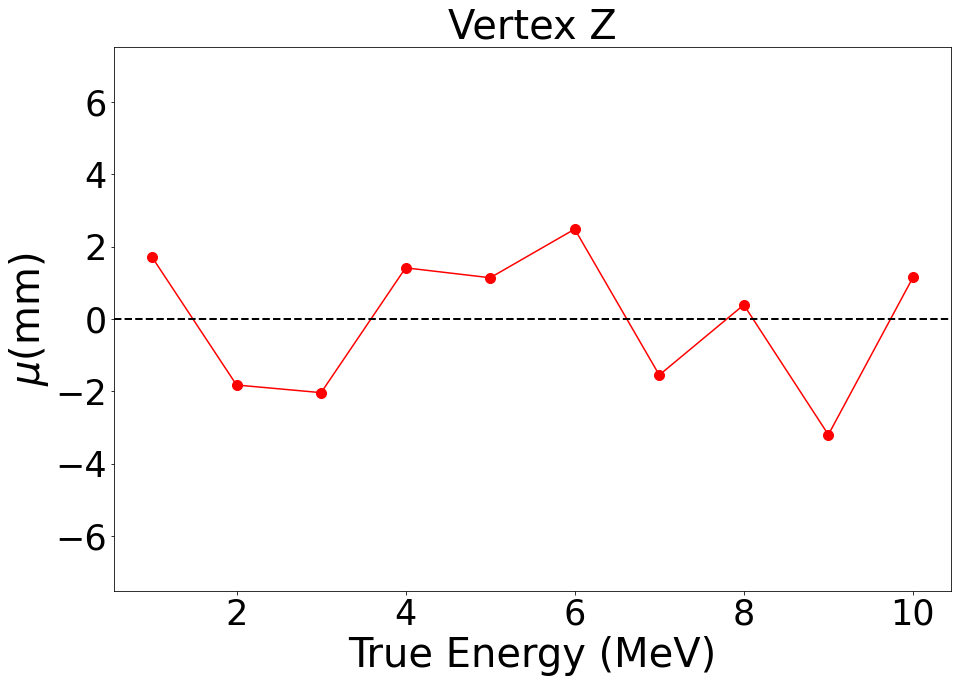

In [26]:
# plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.figsize'] = (15, 10)


# plt.plot(energy_list,1000*np.abs(re_si_x)/energy_list,'-or',markersize=10)
# plt.title('Vertex X',fontsize = 40)
# plt.xlabel('True Energy (MeV)',fontsize = 40)
# plt.ylabel('$\sigma$/E (mm)',fontsize = 40)
# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)


# plt.plot(energy_list,1000*np.abs(re_si_y)/energy_list,'-or',markersize=10)
# plt.title('Vertex Y',fontsize = 40)
# plt.xlabel('True Energy (MeV)',fontsize = 40)
# plt.ylabel('$\sigma$/E (mm)',fontsize = 40)
# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)


# plt.plot(energy_list,1000*np.abs(re_si_z)/energy_list,'-or',markersize=10)
# plt.title('Vertex Z',fontsize = 40)
# plt.xlabel('True Energy (MeV)',fontsize = 40)
# plt.ylabel('$\sigma$/E (mm)',fontsize = 40)
# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)


# plt.plot(energy_list,np.array(re_mu_x)*1000,'-or',markersize=10)
# plt.axhline(y=0,linestyle='--',color='black',linewidth=2.0)
# plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/E',fontsize = 40)
# plt.title('Vertex X',fontsize = 40)
# plt.xlabel('True Energy (MeV)',fontsize = 40)
# plt.ylabel('$\mu$(mm)',fontsize = 40)
# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)
# plt.ylim([-7.5,7.5])


# plt.plot(energy_list,np.array(re_mu_y)*1000,'-or',markersize=10)
# plt.axhline(y=0,linestyle='--',color='black',linewidth=2.0)
# plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/E',fontsize = 40)
# plt.title('Vertex Y',fontsize = 40)
# plt.xlabel('True Energy (MeV)',fontsize = 40)
# plt.ylabel('$\mu$(mm)',fontsize = 40)
# plt.xticks(fontsize = 35)
# plt.yticks(fontsize = 35)
# plt.ylim([-7.5,7.5])



plt.plot(energy_list,np.array(re_mu_z)*1000,'-or',markersize=10)
plt.axhline(y=0,linestyle='--',color='black',linewidth=2.0)
plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/E',fontsize = 40)
plt.title('Vertex Z',fontsize = 40)
plt.xlabel('True Energy (MeV)',fontsize = 40)
plt.ylabel('$\mu$(mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-7.5,7.5])
plt.show()



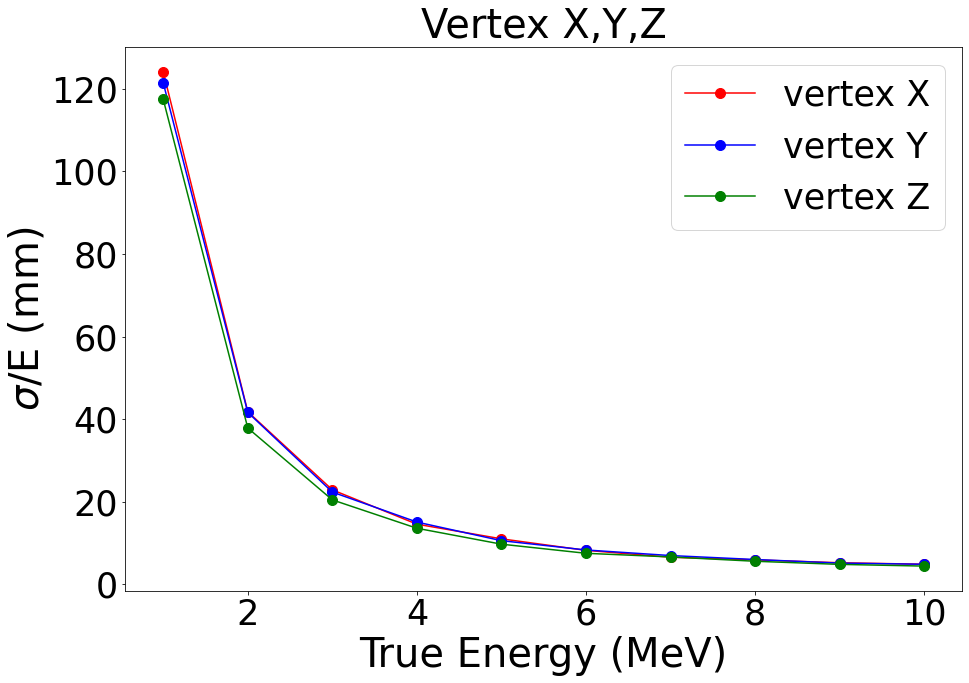

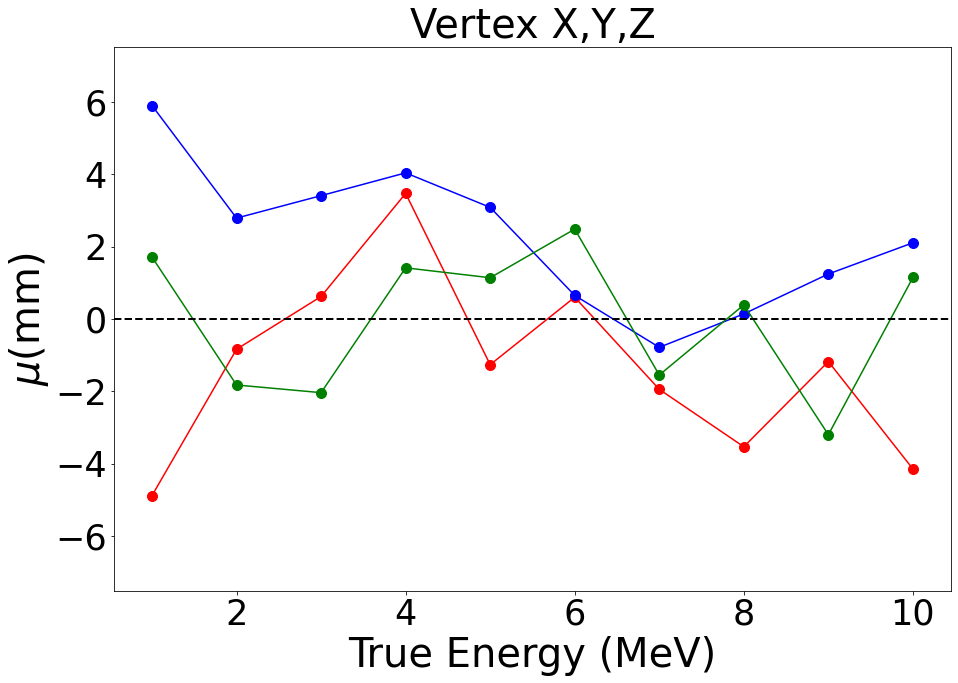

In [27]:
# plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.figsize'] = (15, 10)


plt.plot(energy_list,1000*np.abs(re_si_x)/energy_list,'-or',label='vertex X',markersize=10)

plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)


plt.plot(energy_list,1000*np.abs(re_si_y)/energy_list,'-ob',label='vertex Y',markersize=10)

plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)


plt.plot(energy_list,1000*np.abs(re_si_z)/energy_list,'-og',label='vertex Z',markersize=10)
plt.title('Vertex X,Y,Z',fontsize = 40)
plt.xlabel('True Energy (MeV)',fontsize = 40)
plt.ylabel('$\sigma$/E (mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.legend(fontsize = 35)
plt.show()





plt.plot(energy_list,np.array(re_mu_x)*1000,'-or',markersize=10,label='vertex X')
plt.ylabel('$\mu$(mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-7.5,7.5])

plt.plot(energy_list,np.array(re_mu_y)*1000,'-ob',markersize=10,label='vertex Y')
plt.ylabel('$\mu$(mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-7.5,7.5])

plt.plot(energy_list,np.array(re_mu_z)*1000,'-og',markersize=10,label='vertex Z')
plt.axhline(y=0,linestyle='--',color='black',linewidth=2.0)
plt.title('\nGaussian fitting \n$\mu$ & $\sigma$/E',fontsize = 40)
plt.title('Vertex X,Y,Z',fontsize = 40)
plt.xlabel('True Energy (MeV)',fontsize = 40)
plt.ylabel('$\mu$(mm)',fontsize = 40)
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylim([-7.5,7.5])
# plt.legend(fontsize = 35)

plt.show()



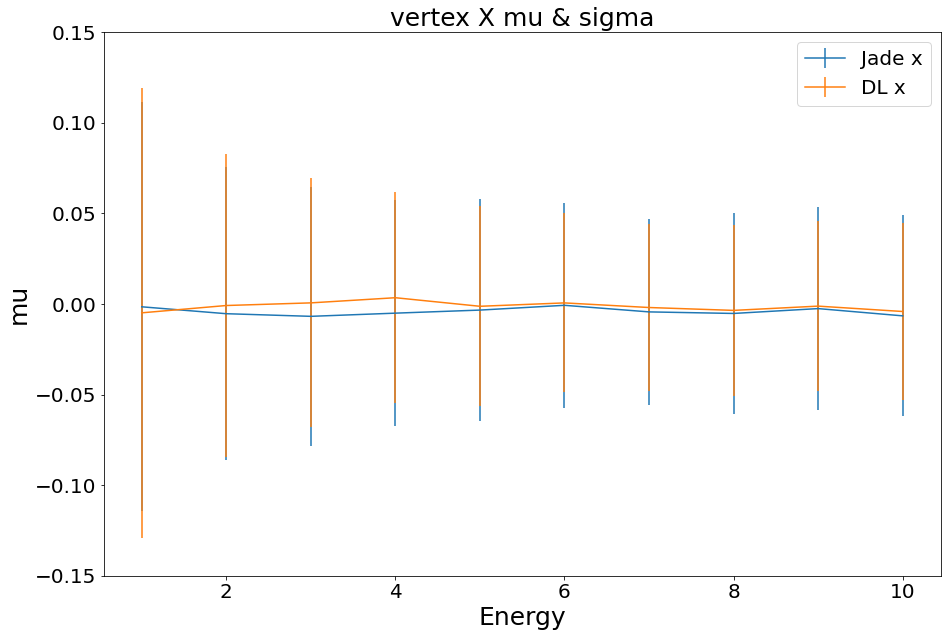

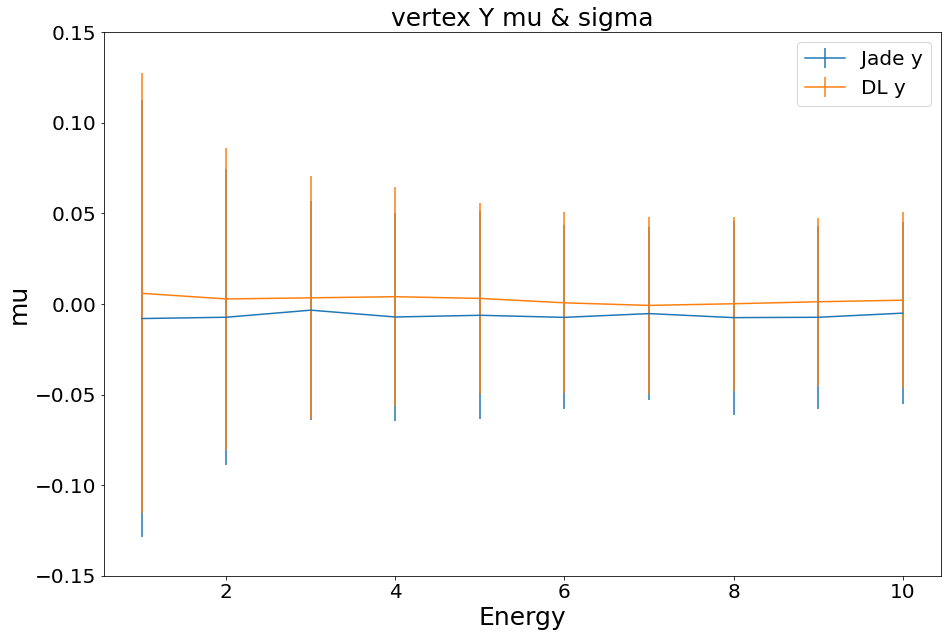

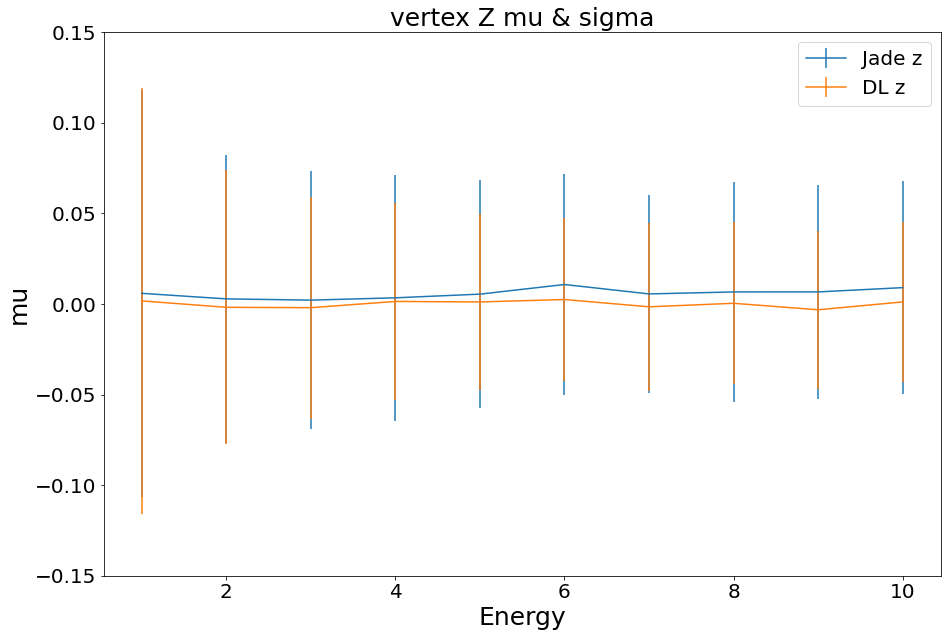

In [28]:


plt.errorbar(energy_list,ja_mu_x,yerr=ja_si_x,label = 'Jade x')
plt.errorbar(energy_list,re_mu_x,yerr=re_si_x,label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)

plt.show()
plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y,label = 'Jade y')
plt.errorbar(energy_list,re_mu_y,yerr=re_si_y,label = 'DL y')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()
plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z,label = 'Jade z')
plt.errorbar(energy_list,re_mu_z,yerr=re_si_z,label = 'DL z')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()



In [29]:
factors = np.array([563.0221626975239,
 594.7132546988246,
 601.0261662717841,
 603.3496508038421,
 606.245551101448,
 607.8146218430694,
 608.0734553337685,
 609.6059678993302,
 610.7470728682902,
 610.372724509755,
 614.1176872310751,
 615.9438708016364,
 617.6478901536096,
 617.6539808010087,
 617.4080711988676,
 617.1266067817692,
 616.5398292026267,
 615.4312071692044,
 614.5300611501978,
 613.4294817891464,
 612.6916556565828,
 610.7016892798202,
 609.4712950346319,
 608.6802713239357]).reshape(-1,1)

In [30]:
factors[0]

array([563.0221627])

In [31]:
for i in range(10):
    jade[:,3][label[:,3]==(i+1)] = jade[:,3][label[:,3]==(i+1)]*(5048.16/8)/factors[i]

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


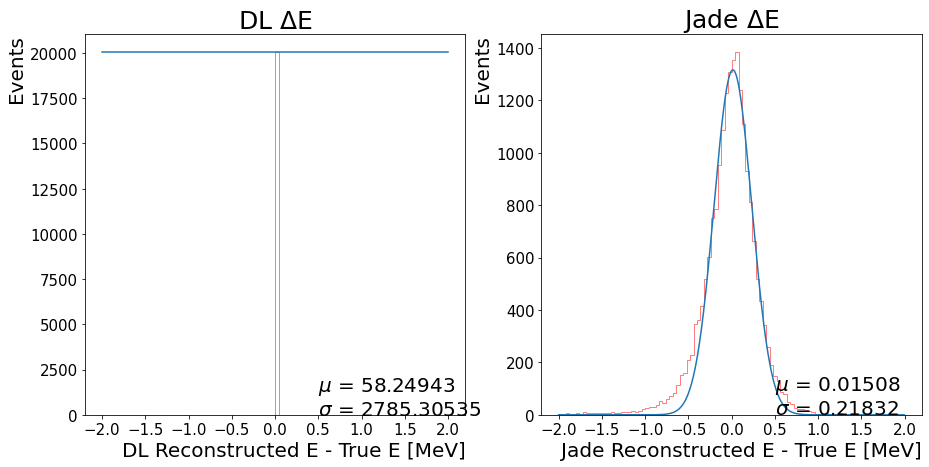

In [32]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1,2,1)
tmp_hist = plt.hist(pred[:,3]-label[:,3],bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-2,2,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL ' + r'$\Delta$E',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("DL Reconstructed E - True E [MeV]", fontsize=20, loc='right')
plt.ylabel("Events", fontsize=20, loc='top')

plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=20)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.subplot(1,2,2)
tmp_hist = plt.hist(jade[:,3]-label[:,3],bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = False, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-2,2,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('Jade ' + r'$\Delta$E',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Jade Reconstructed E - True E [MeV]", fontsize=20, loc='right')
plt.ylabel("Events", fontsize=20, loc='top')
plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=20)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()


# for i in range(10):
#     plt.hist(pred[:,3][label[:,3]==(i+1)],bins=50, color= 'r', alpha = 0.5, density = True, histtype = 'step')
#     plt.hist(jade[:,3][label[:,3]==(i+1)],bins=50, color= 'b', alpha = 0.5, density = True, histtype = 'step')

   

In [33]:
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (7, 7)
data = pred[:,3]-label[:,3]
# 히스토그램 생성
hist, bin_edges = np.histogram(data, bins=100, range=(-2, 2))

# 히스토그램 중심 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 초기 파라미터 추정
mu_guess = 0
sigma_guess = 1
A_guess = np.max(hist)

# 초기 추정값으로부터 gaussian 함수 정의
def gaussian(x, A, mu, sigma):
    return A * norm.pdf(x, mu, sigma)

# curve_fit 메소드를 사용하여 gaussian fitting 수행

p0 = [A_guess, mu_guess, sigma_guess]
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0)

# 파라미터 값과 에러 출력
print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))

# 플롯 생성
plt.hist(data, bins=100, range=(-2, 2), density=False, alpha=0.5, histtype = 'step')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Fit')
plt.legend()
plt.show()




plt.rcParams['figure.figsize'] = (7, 7)
data = jade[:,3]-label[:,3]
# 히스토그램 생성
hist, bin_edges = np.histogram(data, bins=100, range=(-2, 2))

# 히스토그램 중심 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 초기 파라미터 추정
mu_guess = 0
sigma_guess = 1
A_guess = np.max(hist)

# 초기 추정값으로부터 gaussian 함수 정의
def gaussian(x, A, mu, sigma):
    return A * norm.pdf(x, mu, sigma)

# curve_fit 메소드를 사용하여 gaussian fitting 수행

p0 = [A_guess, mu_guess, sigma_guess]
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0)

# 파라미터 값과 에러 출력
print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))

# 플롯 생성
plt.hist(data, bins=100, range=(-2, 2), density=False, alpha=0.5, histtype = 'step')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Fit')
plt.legend()
plt.show()



RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
from scipy.stats import norm
data = jade[:,3]-label[:,3]
# 히스토그램 생성
hist, bin_edges = np.histogram(data, bins=100, range=(-5, 5))

# 히스토그램 중심 계산
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 초기 파라미터 추정
mu_guess = 0
sigma_guess = 1
A_guess = np.max(hist)

# 초기 추정값으로부터 gaussian 함수 정의
def gaussian(x, A, mu, sigma):
    return A * norm.pdf(x, mu, sigma)

# curve_fit 메소드를 사용하여 gaussian fitting 수행
from scipy.optimize import curve_fit
p0 = [A_guess, mu_guess, sigma_guess]
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=p0)

# 파라미터 값과 에러 출력
print("A: %.5f +/- %.5f" % (popt[0], np.sqrt(pcov[0][0])))
print("mu: %.5f +/- %.5f" % (popt[1], np.sqrt(pcov[1][1])))
print("sigma: %.5f +/- %.5f" % (popt[2], np.sqrt(pcov[2][2])))

# 플롯 생성
plt.hist(data, bins=100, range=(-5, 5), density=True, alpha=0.5)
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label='Fit')
plt.legend()
plt.show()

In [ ]:
h1 = ROOT.TH1D("h1", "Histogram", 100, -5, 5)
for i in range(len(label[:,3]-pred[:,3])):
    h1.Fill((pred[:,3]-label[:,3])[i])
h1.SetTitle("DL #DeltaE")
h1.GetXaxis().SetTitle("MeV")
h1.GetYaxis().SetTitle("au")

h1.Scale(1.0/h1.Integral())  # normalize

f1 = ROOT.TF1("f1", "gaus", -3, 3)
h1.Fit(f1)
c1 = ROOT.TCanvas("c1", "Canvas", 800, 600)
h1.Draw()
f1.Draw("same")
c1.SaveAs("DL energy difference.png")

In [ ]:
h1 = ROOT.TH1D("h1", "Histogram", 100, -5, 5)
for i in range(len(jade[:,3]-label[:,3])):
    h1.Fill((label[:,3]-jade[:,3])[i])
h1.SetTitle("JADE #DeltaE")
h1.GetXaxis().SetTitle("MeV")
h1.GetYaxis().SetTitle("au")

h1.Scale(1.0/h1.Integral())  # normalize

f1 = ROOT.TF1("f1", "gaus", -3, 3)
h1.Fit(f1)
c1 = ROOT.TCanvas("c1", "Canvas", 800, 600)
h1.Draw()
f1.Draw("same")
c1.SaveAs("jade energy difference.png")

In [ ]:
dl_e_mu = []
dl_e_sigma = []
ja_e_mu = []
ja_e_sigma = []

for energy in range(10):
    plt.rcParams['figure.figsize'] = (15, 7)
    plt.subplot(1,2,1)
    tmp_hist = plt.hist(pred[:,3][label[:,3]==(energy+1)]-label[:,3][label[:,3]==(energy+1)],bins = 50, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-2,2,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$E',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=25)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    
    dl_e_mu.append(popt[1])
    dl_e_sigma.append(popt[2])
    
    
    plt.subplot(1,2,2)
    tmp_hist = plt.hist(jade[:,3][label[:,3]==(energy+1)]-label[:,3][label[:,3]==(energy+1)],bins = 50, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-2,2,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$E',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=25)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    
    ja_e_mu.append(popt[1])
    ja_e_sigma.append(popt[2])
    
    plt.show()
    # for i in range(10):
    #     plt.hist(pred[:,3][label[:,3]==(i+1)],bins=50, color= 'r', alpha = 0.5, density = True, histtype = 'step')
    #     plt.hist(jade[:,3][label[:,3]==(i+1)],bins=50, color= 'b', alpha = 0.5, density = True, histtype = 'step')

   

In [ ]:
E_Ns = []
for i in range(10):
    print(label[:,3][label[:,3]==(i+1)].shape[0])
    E_Ns.append(label[:,3][label[:,3]==(i+1)].shape[0])

In [ ]:
plt.errorbar(energy_list,ja_e_mu,yerr=ja_e_sigma/np.sqrt(np.array(E_Ns)),label = 'Jade',color = 'red')
plt.errorbar(energy_list,dl_e_mu,yerr=dl_e_sigma/np.sqrt(np.array(E_Ns)),label = 'DL',color = 'blue')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('Energy difference mu & sigma (Prediction - True)',fontsize = 25)
plt.xlabel('True Energy',fontsize = 25)
plt.ylabel('mean',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.ylim([-0.15,0.15])
plt.legend(fontsize=20,loc='upper left')

plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.hist(pred[:,3],bins = 500, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.xlim([0,13])
# plt.axvline(x=0)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.hist(jade[:,3],bins = 500, color= 'r', alpha = 0.5, density = True, histtype = 'step')
plt.xlim([0,13])
# plt.axvline(x=0)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.hist(jade[:,3],bins = 500, color= 'r', alpha = 0.5, density = False, histtype = 'step',label='Jade')
plt.hist(pred[:,3],bins = 500, color= 'b', alpha = 0.5, density = False, histtype = 'step',label='DL')
plt.xlim([0,13])
plt.xlabel("MeV",fontsize=20,loc='right')
plt.ylabel("Events",fontsize=20,loc='top')
plt.title("Reconstructed energy distribution",fontsize=35)
# plt.axvline(x=0)
plt.legend(fontsize=20)
plt.show()

In [ ]:
dl_resolution = []
ja_resolution = []
for energy in range(10):
    plt.rcParams['figure.figsize'] = (15, 7)
    plt.subplot(1,2,1)
    tmp_hist = plt.hist(pred[:,3][label[:,3]==(energy+1)],bins = 100, range = [-2+energy,2+energy], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[energy+1,0.01,2], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=2000)
    hist_xx = np.arange(-2+energy,2+energy,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL '+str(energy+1)+'MeV',fontsize = 35)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("MeV", fontsize=20, loc='right')
    plt.text(-2+energy,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}" + '\nresolution = ' + f"{np.abs(popt[2])/popt[1]:.5f}",fontsize=20)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    dl_resolution.append(np.abs(popt[2])/popt[1])
    plt.subplot(1,2,2)
    tmp_hist = plt.hist(jade[:,3][label[:,3]==(energy+1)],bins = 100, range = [-2+energy,2+energy], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[energy+1,0.01,2], sigma=1./np.sqrt(hist_N), absolute_sigma=True,maxfev=2000)
    hist_xx = np.arange(-2+energy,2+energy,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade '+str(energy+1)+'MeV',fontsize = 35)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("MeV", fontsize=20, loc='right')
    plt.text(-2+energy,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}" + '\nresolution = ' + f"{np.abs(popt[2])/popt[1]:.5f}",fontsize=20)
    ja_resolution.append(np.abs(popt[2])/popt[1])
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(energy_list, ja_resolution,'or',label='JADE')
plt.plot(energy_list, dl_resolution,'ob',label='DL')
plt.legend(fontsize = 25,loc = 'best')
plt.xlabel('True Energy',fontsize = 30)
plt.ylabel('Resolution',fontsize = 30)
plt.show()

In [ ]:
energy_list

In [ ]:
# plt.subplot(4,1,1)
R2_label = np.power(label[:,0],2)+np.power(label[:,1],2)
R2_pred = np.power(pred[:,0],2)+np.power(pred[:,1],2)
Z_label = label[:,2]
Z_pred = pred[:,2]
R2_jade = np.power(jade[:,0],2)+np.power(jade[:,1],2)
Z_jade = jade[:,2]

In [ ]:
ZZ = [8,1.0,0.8,0.6,0.4,0.2,0,-0.2,-0.4,-0.6,-0.8,-1.0,-8]  # 13개

RR = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]# 11개

In [ ]:
ZZ = [8,0.8,0.4,-0.4,-0.8,-8]

RR = [0,0.4,0.8,1.2,1.6,20]

In [ ]:
section_dl_mu = []
section_dl_sigma = []
section_ja_mu = []
section_ja_sigma = []
for ver in range(3):
##################
    plt.rcParams['figure.figsize'] = (10, 10)
    for k in range(5):
        for j in range(5):


            plt.subplot(5,5,5*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
        #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 5)
            plt.yticks(fontsize = 5)

            plt.xlabel("m", fontsize=5, loc='right')
        #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


        #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
        #         plt.vlines(0,0,15,colors='red')
            plt.grid()
            # plt.ylim([0,20])        
            plt.legend(fontsize = 15)
            
            section_dl_mu.append(popt[1])
            section_dl_sigma.append(popt[2])
            section_ja_mu.append(popt_jade[1])
            section_ja_sigma.append(popt_jade[2])
            
            
            
    plt.show()

In [ ]:
section_dl_mu = np.array(section_dl_mu)
section_dl_sigma = np.array(section_dl_sigma)
section_ja_mu = np.array(section_ja_mu)
section_ja_sigma = np.array(section_ja_sigma)

In [ ]:
section_dl_mu = section_dl_mu.reshape(3,5,5)
section_dl_sigma = section_dl_sigma.reshape(3,5,5)
section_ja_mu = section_ja_mu.reshape(3,5,5)
section_ja_sigma = section_ja_sigma.reshape(3,5,5)

In [ ]:
section_dl_mu = section_dl_mu.reshape(3,10,12)
section_dl_sigma = section_dl_sigma.reshape(3,10,12)
section_ja_mu = section_ja_mu.reshape(3,10,12)
section_ja_sigma = section_ja_sigma.reshape(3,10,12)

In [ ]:
section_dl_mu.shape

In [ ]:
for k in range(12):
    for j in range(10):


        fig = plt.subplot(10,12,10*k+(j+1))
        if np.abs(section_dl_mu[0,j,k])> np.abs(section_ja_mu[0,j,k]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[0,j,k]) < np.abs(section_ja_mu[0,j,k]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:
for k in range(12):
    for j in range(10):


        fig = plt.subplot(10,12,10*k+(j+1))
        if np.abs(section_dl_mu[1,j,k]) > np.abs(section_ja_mu[1,j,k]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[1,j,k]) < np.abs(section_ja_mu[1,j,k]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:
for k in range(12):
    for j in range(10):


        fig = plt.subplot(10,12,10*k+(j+1))
        if np.abs(section_dl_mu[2,j,k]) > np.abs(section_ja_mu[2,j,k]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[2,j,k]) < np.abs(section_ja_mu[2,j,k]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[0,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:
for k in range(5):
    for j in range(5):


        fig = plt.subplot(5,5,5*k+(j+1))
        if np.abs(section_dl_mu[0,k,j]) > np.abs(section_ja_mu[0,k,j]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[0,k,j]) < np.abs(section_ja_mu[0,k,j]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[2,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:
for k in range(5):
    for j in range(5):


        fig = plt.subplot(5,5,5*k+(j+1))
        if np.abs(section_dl_mu[1,k,j]) > np.abs(section_ja_mu[1,k,j]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[1,k,j]) < np.abs(section_ja_mu[1,k,j]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[2,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:
for k in range(5):
    for j in range(5):


        fig = plt.subplot(5,5,5*k+(j+1))
        if np.abs(section_dl_mu[2,k,j]) > np.abs(section_ja_mu[2,k,j]):
            fig.patch.set_facecolor('red')
            fig.patch.set_alpha(0.5)
        elif np.abs(section_dl_mu[2,k,j]) < np.abs(section_ja_mu[2,k,j]):
            fig.patch.set_facecolor('blue')
            fig.patch.set_alpha(0.5)
#         plt.text(0.1,0.3,'DL = ' + f'{section_dl_mu[2,k,j]:.5f}'+'\n     \u00B1'+f'{section_dl_sigma[0,k,j]:.5f}',fontsize=10)
#         plt.text(0.1,0.7,'Jade = ' + f'{section_ja_mu[,k,j]:.5f}'+'\n     \u00B1'+f'{section_ja_sigma[0,k,j]:.5f}',fontsize=10)

        plt.xticks([])
        plt.yticks([])


In [ ]:


Z_re_mu_z_up = []
Z_re_mu_z_mi = []
Z_re_mu_z_do = []

Z_re_si_z_up = []
Z_re_si_z_mi = []
Z_re_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_up.append(popt[1])
            Z_re_si_z_up.append(popt[2])
        if k == 1:
            Z_re_mu_z_mi.append(popt[1])
            Z_re_si_z_mi.append(popt[2])
        if k == 2:
            Z_re_mu_z_do.append(popt[1])
            Z_re_si_z_do.append(popt[2])




In [ ]:

Z_ja_mu_z_up = []
Z_ja_mu_z_mi = []
Z_ja_mu_z_do = []

Z_ja_si_z_up = []
Z_ja_si_z_mi = []
Z_ja_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if k == 0:
            Z_ja_mu_z_up.append(popt[1])
            Z_ja_si_z_up.append(popt[2])
        if k == 1:
            Z_ja_mu_z_mi.append(popt[1])
            Z_ja_si_z_mi.append(popt[2])
        if k == 2:
            Z_ja_mu_z_do.append(popt[1])
            Z_ja_si_z_do.append(popt[2])



In [ ]:

plt.rcParams['figure.figsize'] = (4, 14)
plt.subplot(3,1,1)
plt.errorbar(energy_list,Z_ja_mu_z_up,yerr=Z_ja_si_z_up,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_up,yerr=Z_re_si_z_up,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,1,2)

plt.errorbar(energy_list,Z_ja_mu_z_mi,yerr=Z_ja_si_z_mi,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_mi,yerr=Z_re_si_z_mi,label = 'DL z')
plt.title('vertex Z mu & sigma middle',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()


plt.subplot(3,1,3)
plt.errorbar(energy_list,Z_ja_mu_z_do,yerr=Z_ja_si_z_do,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_do,yerr=Z_re_si_z_do,label = 'DL z')
plt.title('vertex Z mu & sigma down',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_re_mu_z_1 = []
Z_re_mu_z_2 = []
Z_re_mu_z_3 = []
Z_re_mu_z_4 = []
Z_re_mu_z_5 = []
Z_re_mu_z_6 = []

Z_re_si_z_1 = []
Z_re_si_z_2 = []
Z_re_si_z_3 = []
Z_re_si_z_4 = []
Z_re_si_z_5 = []
Z_re_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_1.append(popt[1])
            Z_re_si_z_1.append(popt[2])
        if k == 1:
            Z_re_mu_z_2.append(popt[1])
            Z_re_si_z_2.append(popt[2])
        if k == 2:
            Z_re_mu_z_3.append(popt[1])
            Z_re_si_z_3.append(popt[2])
        if k == 3:
            Z_re_mu_z_4.append(popt[1])
            Z_re_si_z_4.append(popt[2])
        if k == 4:
            Z_re_mu_z_5.append(popt[1])
            Z_re_si_z_5.append(popt[2])        
        if k == 5:
            Z_re_mu_z_6.append(popt[1])
            Z_re_si_z_6.append(popt[2])        
        
        
        
        

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_ja_mu_z_1.append(popt[1])
            Z_ja_si_z_1.append(popt[2])
        if k == 1:
            Z_ja_mu_z_2.append(popt[1])
            Z_ja_si_z_2.append(popt[2])
        if k == 2:
            Z_ja_mu_z_3.append(popt[1])
            Z_ja_si_z_3.append(popt[2])
        if k == 3:
            Z_ja_mu_z_4.append(popt[1])
            Z_ja_si_z_4.append(popt[2])
        if k == 4:
            Z_ja_mu_z_5.append(popt[1])
            Z_ja_si_z_5.append(popt[2])        
        if k == 5:
            Z_ja_mu_z_6.append(popt[1])
            Z_ja_si_z_6.append(popt[2])        
        
        
        
        

In [ ]:

plt.rcParams['figure.figsize'] = (12, 12)
plt.subplot(3,2,1)
plt.errorbar(energy_list,Z_ja_mu_z_1,yerr=Z_ja_si_z_1,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_1,yerr=Z_re_si_z_1,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,2)
plt.errorbar(energy_list,Z_ja_mu_z_2,yerr=Z_ja_si_z_2,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_2,yerr=Z_re_si_z_2,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,3)
plt.errorbar(energy_list,Z_ja_mu_z_3,yerr=Z_ja_si_z_3,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_3,yerr=Z_re_si_z_3,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,4)
plt.errorbar(energy_list,Z_ja_mu_z_4,yerr=Z_ja_si_z_4,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_4,yerr=Z_re_si_z_4,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,5)
plt.errorbar(energy_list,Z_ja_mu_z_5,yerr=Z_ja_si_z_5,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_5,yerr=Z_re_si_z_5,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,6)
plt.errorbar(energy_list,Z_ja_mu_z_6,yerr=Z_ja_si_z_6,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_6,yerr=Z_re_si_z_6,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()


In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        
    if k == 5:
        Z_ja_mu_z_6.append(popt[1])
        Z_ja_si_z_6.append(popt[2])        



        

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        
    if k == 5:
        Z_pr_mu_z_6.append(popt[1])
        Z_pr_si_z_6.append(popt[2])        


In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5,Z_ja_mu_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5,Z_pr_mu_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5,Z_ja_si_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5,Z_pr_si_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []


Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(jade[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        





In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(pred[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)


    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:

plt.plot(pred[:,3],jade[:,3],'.r')
plt.xlabel('DL')
plt.ylabel('True')
plt.show()

plt.hist(pred[:,3])